## Hey all,

### You are welcome to the project of trending youtube videos analysis.

<p style="font-size:18px; font-weight:normal">In the project, all YouTube trending videos from 2020-2023 are analyzed. The analysis contains more-advanced and more-interesting elements.</p>

<!-- <a style="font-size:18px; font-weight:bold; color:#d42b21" href="https://ammar-alyousfi.com/2020/youtube-trending-videos-analysis-2019-us?src=kgl">You can view the new analysis by clicking on this link</a> -->

<hr>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [ ]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

## <a name="read"></a>Reading the dataset
Then we read the dataset file which is in csv format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing US dataset for youtube trending videos

In [ ]:
path = "/content/drive/MyDrive/dataset of youtube analysis /archive/US_youtube_trending_data.csv"
df = pd.read_csv(path)

We set some configuration options just for improving visualization graphs; nothing crucial

In [ ]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## <a name="feel"></a>Getting a feel of the dataset
Let's get a feel of our dataset by displaying its first few rows

In [ ]:
df.head()

video_id                                              title  \
0  3C66w5Z0ixs                 I ASKED HER TO BE MY GIRLFRIEND...   
1  M9Pmf9AB4Mo  Apex Legends | Stories from the Outlands – “Th...   
2  J78aPJ3VyNs  I left youtube for a month and THIS is what ha...   
3  kXLn3HkpjaA  XXL 2020 Freshman Class Revealed - Official An...   
4  VIUo6yapDbc  Ultimate DIY Home Movie Theater for The LaBran...   

            publishedAt                 channelId   channelTitle  categoryId  \
0  2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg       Brawadis          22   
1  2020-08-11T17:00:10Z  UC0ZV6M2THA81QT9hrVWJG3A   Apex Legends          20   
2  2020-08-11T16:34:06Z  UCYzPXprvl5Y-Sf0g4vX-m6g  jacksepticeye          24   
3  2020-08-11T16:38:55Z  UCbg_UMjlHJg_19SZckaKajg            XXL          10   
4  2020-08-11T15:10:05Z  UCDVPcEbVLQgLZX0Rt6jo34A       Mr. Kate          26   

          trending_date                                               tags  \
0  2020-08-12T00:00:00Z  brawadis|prank|basketball|skits|ghost|funny vi...   
1  2020-08-12T00:00:00Z  Apex Legends|Apex Legends characters|new Apex ...   
2  2020-08-12T00:00:00Z  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  2020-08-12T00:00:00Z  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  2020-08-12T00:00:00Z  The LaBrant Family|DIY|Interior Design|Makeove...   

   view_count   likes  dislikes  comment_count  \
0     1514614  156908      5855          35313   
1     2381688  146739      2794          16549   
2     2038853  353787      2628          40221   
3      496771   23251      1856           7647   
4     1123889   45802       964           2196   

                                   thumbnail_link  comments_disabled  \
0  https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg              False   
1  https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg              False   
2  https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg              False   
3  https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg              False   
4  https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg              False   

   ratings_disabled                                        description  
0             False  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...  
1             False  While running her own modding shop, Ramya Pare...  
2             False  I left youtube for a month and this is what ha...  
3             False  Subscribe to XXL → http://bit.ly/subscribe-xxl...  
4             False  Transforming The LaBrant Family's empty white ...

Now, let's see some information about our dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181790 entries, 0 to 181789
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           181790 non-null  object
 1   title              181790 non-null  object
 2   publishedAt        181790 non-null  object
 3   channelId          181790 non-null  object
 4   channelTitle       181790 non-null  object
 5   categoryId         181790 non-null  int64 
 6   trending_date      181790 non-null  object
 7   tags               181790 non-null  object
 8   view_count         181790 non-null  int64 
 9   likes              181790 non-null  int64 
 10  dislikes           181790 non-null  int64 
 11  comment_count      181790 non-null  int64 
 12  thumbnail_link     181790 non-null  object
 13  comments_disabled  181790 non-null  bool  
 14  ratings_disabled   181790 non-null  bool  
 15  description        177773 non-null  object
dtypes: bool(2), int64(5)

We can see that there are `1,81,790` entries in the dataset. We can see also 

that all columns in the dataset are complete (i.e. they have `1,81,790` non-null entries) except `description` column which has some `null` values; it only has `1,77,773` non-null values.

## <a name="clean"></a>Data cleaning
The `description` column has some null values. These are some of the rows whose description values are null. We can see that null values are denoted by `NaN`

In [ ]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

video_id                                              title  \
223  NSuaUok-wTY  [1147] Locksmith Says My Videos Are BS... Lose...   
249  NYXABBpPJss  When you get on the grill for your friends Bir...   
446  NSuaUok-wTY  [1147] Locksmith Says My Videos Are BS... Lose...   

              publishedAt                 channelId       channelTitle  \
223  2020-08-12T13:00:12Z  UCm9K6rby98W8JigLoZOh6FQ  LockPickingLawyer   
249  2020-08-12T04:36:57Z  UCI8hY4ummWDZgFSjxU_HFNQ  Jeremiah Phillips   
446  2020-08-12T13:00:12Z  UCm9K6rby98W8JigLoZOh6FQ  LockPickingLawyer   

     categoryId         trending_date          tags  view_count  likes  \
223          27  2020-08-13T00:00:00Z  Lock|picking      422963  62939   
249          23  2020-08-13T00:00:00Z        [None]      193157   9057   
446          27  2020-08-14T00:00:00Z  Lock|picking      511773  69610   

     dislikes  comment_count                                  thumbnail_link  \
223       168           7304  https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg   
249       148            666  https://i.ytimg.com/vi/NYXABBpPJss/default.jpg   
446       214           7837  https://i.ytimg.com/vi/NSuaUok-wTY/default.jpg   

     comments_disabled  ratings_disabled description  
223              False             False         NaN  
249              False             False         NaN  
446              False             False         NaN

So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the `description` column

In [ ]:
df["description"] = df["description"].fillna(value="")

In [ ]:
df.dropna(subset=["trending_date"], inplace=True)

In [ ]:
df = df[df["trending_date"] != ' Mike']

## <a name="coll"></a>Dataset collection years
Let's see in which years the dataset was collected

In [ ]:
df["publishing_year"] = df["trending_date"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%Y'))
df["publishing_day"] = df["trending_date"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["trending_date"].apply(lambda x: x[11:13])
df.drop(labels='trending_date', axis=1, inplace=True)

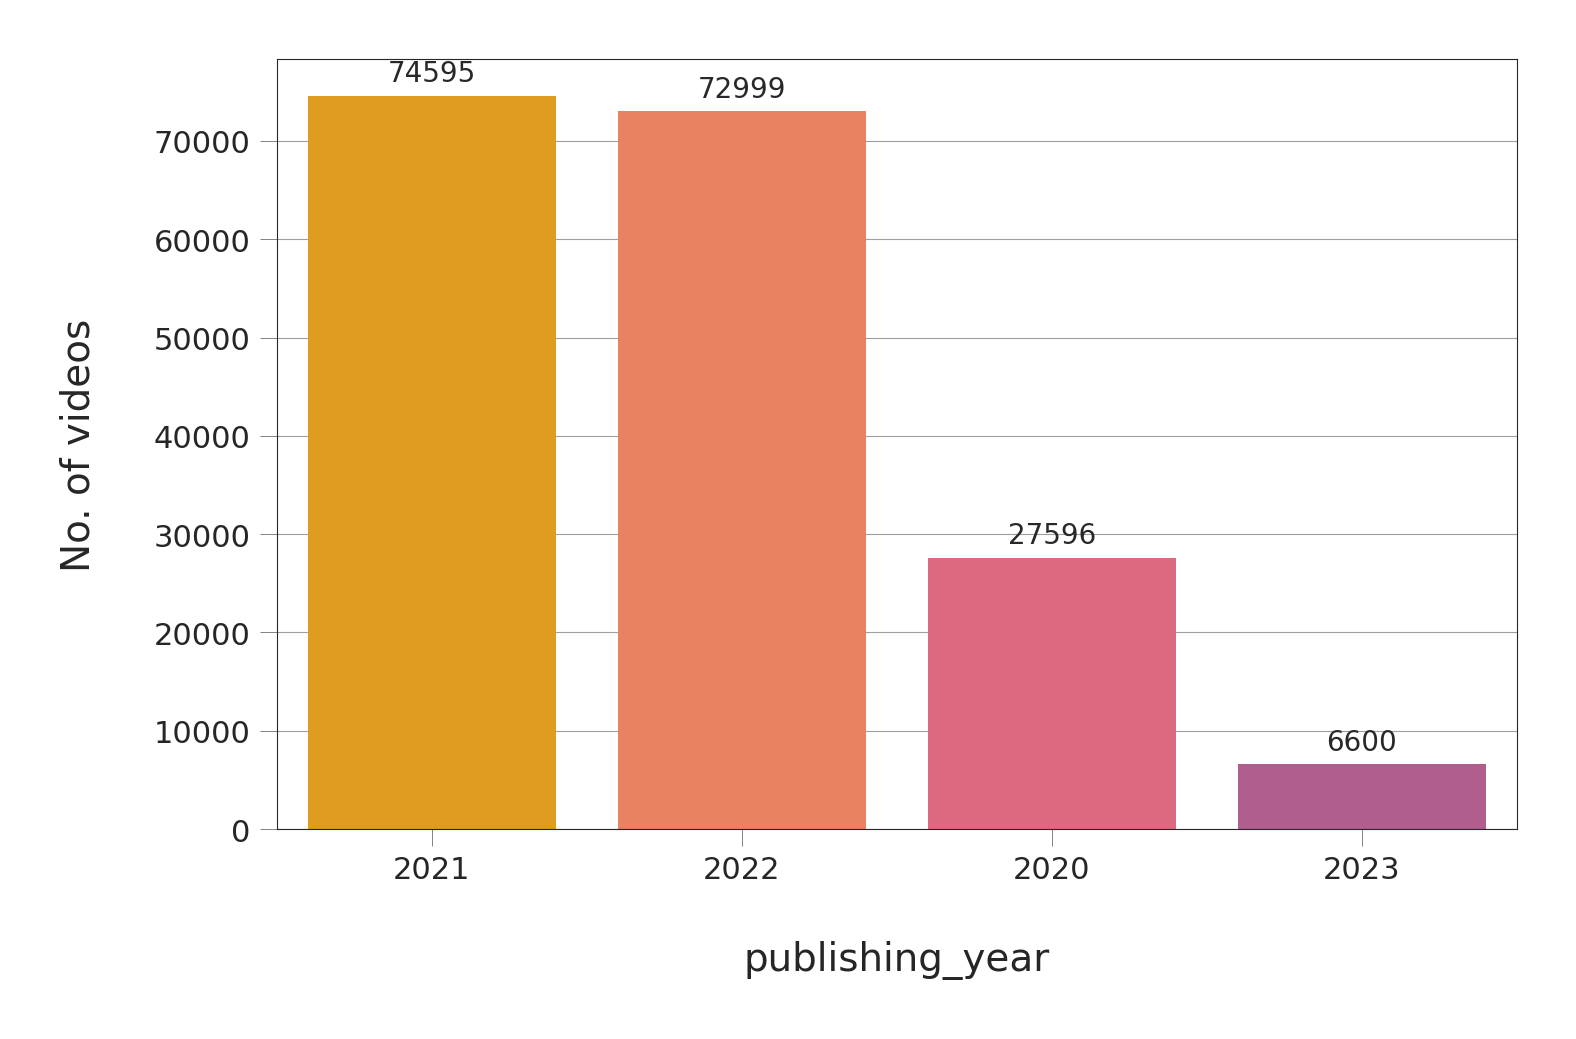

In [ ]:
cdf = df["publishing_year"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_year", "publishing_year": "No_of_videos"})
fig, ax = plt.subplots()
ax.set_facecolor('white') 
_ = sns.barplot(x="publishing_year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ffa600', '#ff764a', '#ef5675', 
                                           '#bc5090'], n_colors=4), ax=ax)
_ = ax.set(xlabel="publishing_year", ylabel="No. of videos")
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=10)

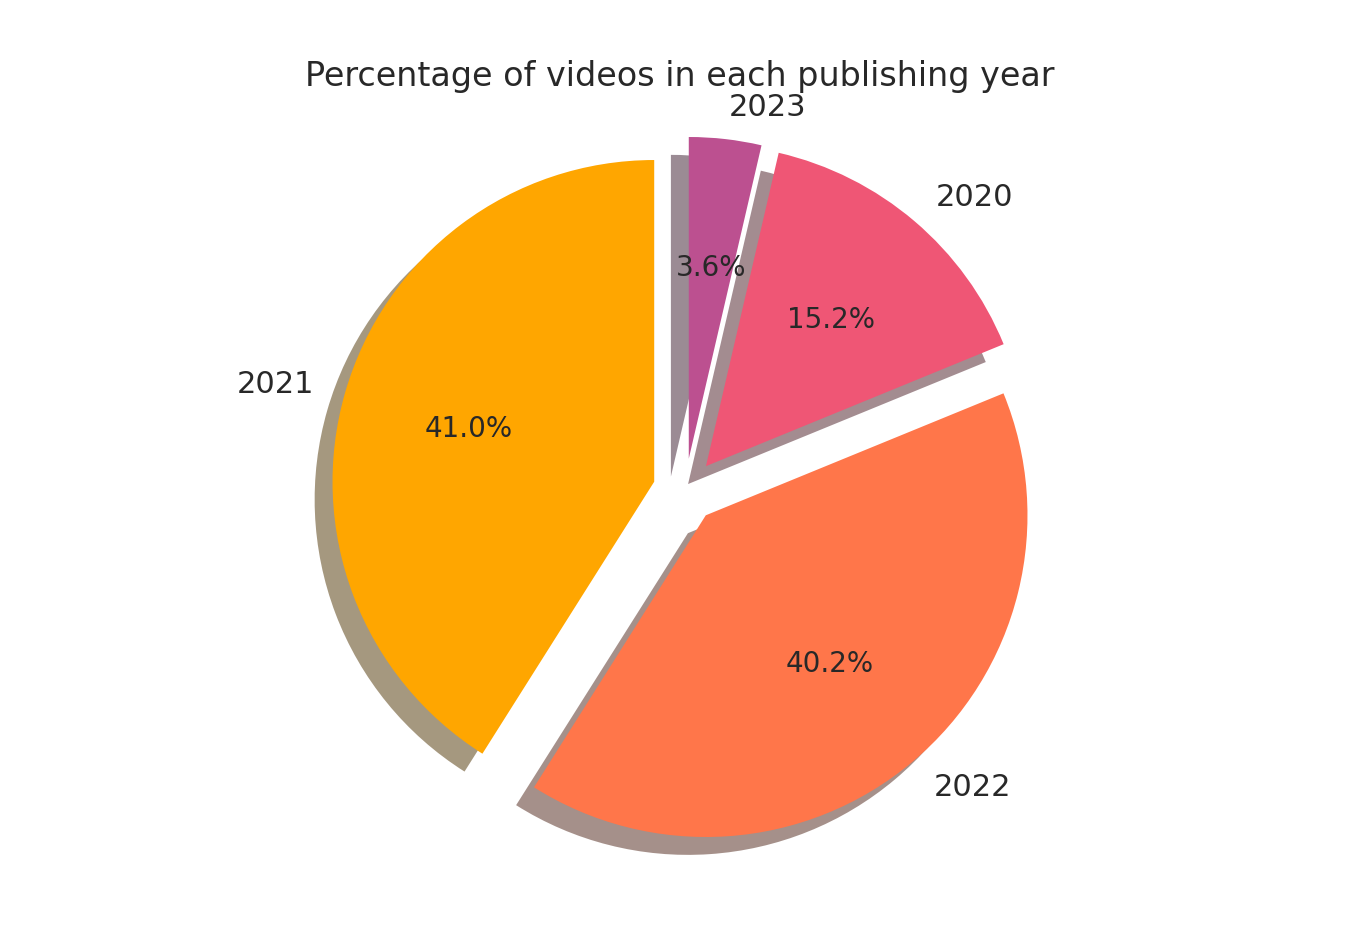

In [ ]:
plt.figure()
sizes = cdf["No_of_videos"]
labels = cdf["publishing_year"]
explode = [0.1] * len(sizes)  # add some separation between slices
_ = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, colors=sns.color_palette(['#ffa600', '#ff764a', '#ef5675',
                                           '#bc5090'], n_colors=4))
_ = plt.axis('equal')
_ = plt.title("Percentage of videos in each publishing year")
plt.show()

We can see that the dataset was collected in 2020, 2021, 2022 and 2023 with `15%`,`40.5%`, `40.9%`and `3.5` of total dataset.

## <a name="descn"></a>Describtion of numerical columns
Now, let's see some statistical information about the numerical columns of our dataset

In [ ]:
df.describe()

categoryId   view_count       likes  dislikes  comment_count
count   181790.00    181790.00   181790.00 181790.00      181790.00
mean        18.84   2515083.39   131557.33   1677.09       11032.38
std          6.75   7032541.54   409223.94   9738.56       83943.10
min          1.00         0.00        0.00      0.00           0.00
25%         17.00    482324.00    19011.25      0.00        1354.00
50%         20.00    979677.00    43862.00    160.00        3001.00
75%         24.00   2203142.50   109402.75    971.00        7114.75
max         29.00 277791741.00 16021534.00 879354.00     6738537.00

We note from the table above that 
- The average number of views of a trending video is `30,50,338.16`. The median value for the number of views is `10,66,285`, which means that one third the trending videos have views that are less than that number, and the other half have views larger than that number
- The average number of likes of a trending video is `74,266`, while the average number of dislikes is `3,711`. The 
- Average comment count is `8,446` while the median is `1,856`

How useful are the observations above? Do they really represent the data? Let's examine more. 

### <a name="vh"></a>Views histogram
let's plot a [histogram](https://www.mathsisfun.com/data/histograms.html) for the `views` column to take a look at its distribution: to see how many videos have between `10` million and `20` million views, how many videos have between `20` million and `30` million views, and so on.

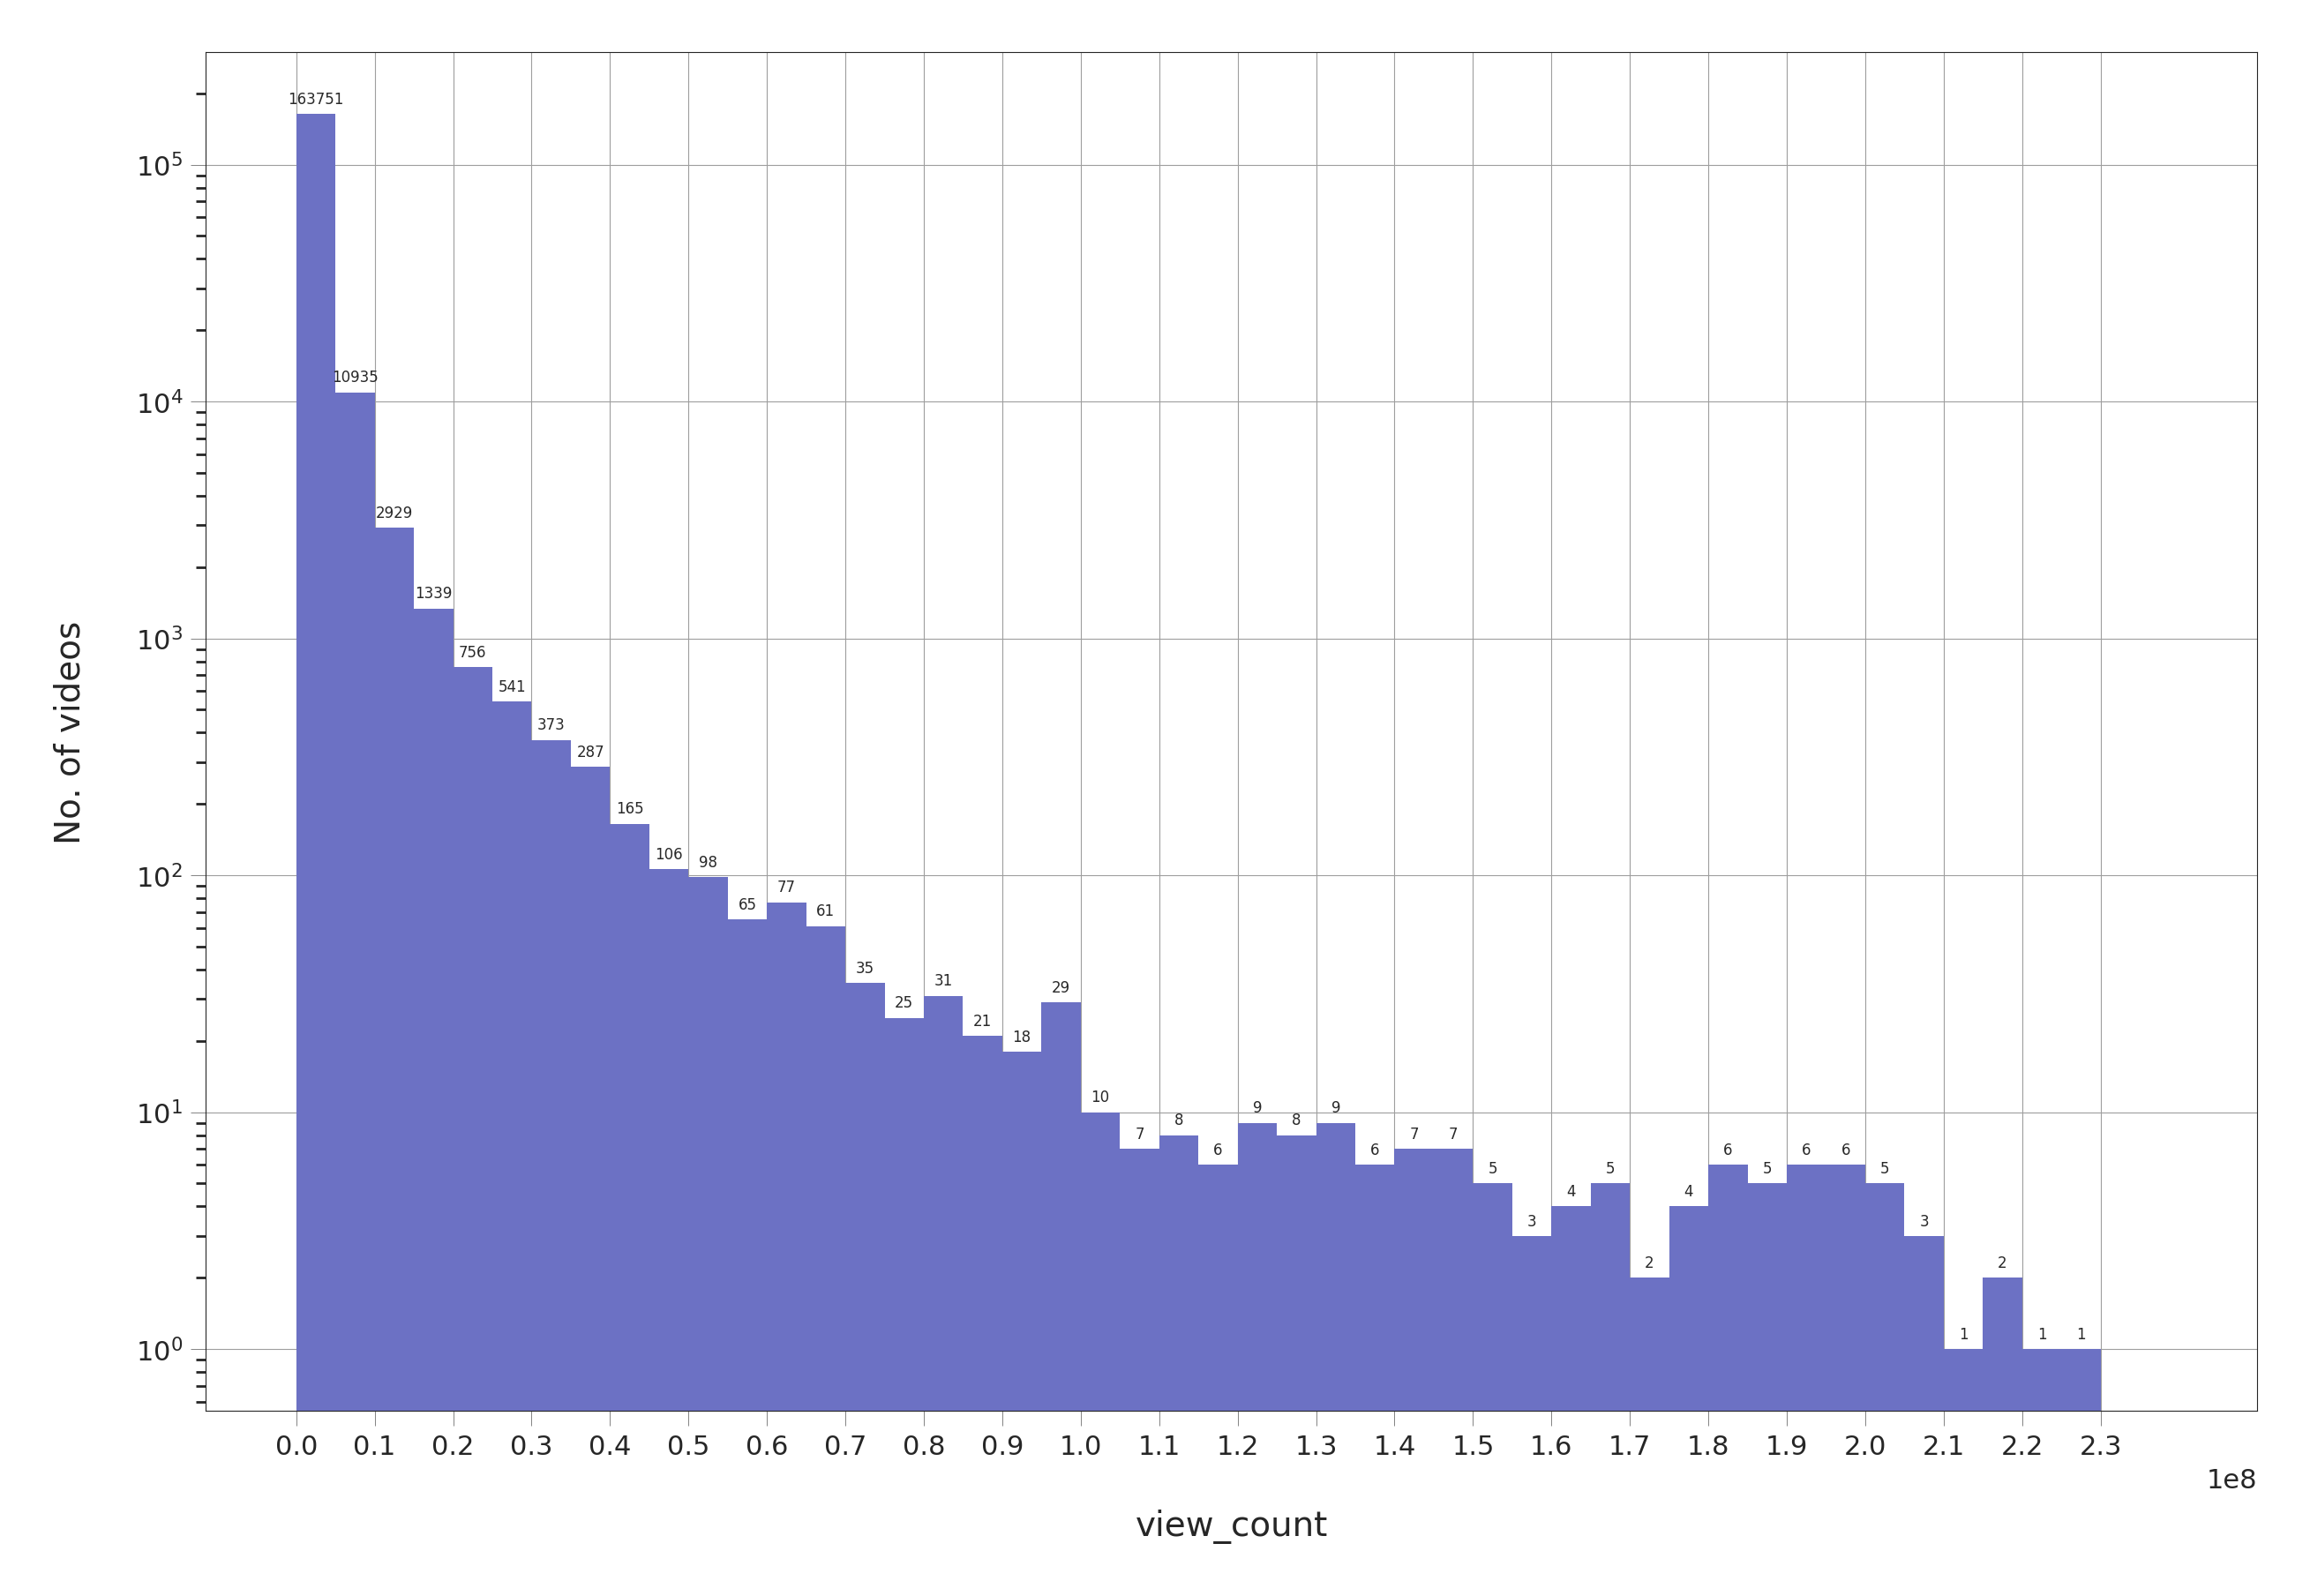

In [ ]:
# Define plot colors
PLOT_COLORS = ["#268BD2", "#D33682", "#F4A200", "#859900", "#6C71C4"]

# Convert non-numeric values in "view_count" column to NaN
df["view_count"] = pd.to_numeric(df["view_count"], errors="coerce")

# Create histogram
fig, ax = plt.subplots(figsize=(15, 10)) 
_ = sns.distplot(df["view_count"].dropna(), kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="view_count", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = ax.set_yscale('log') # set y-axis scale to logarithmic
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)

# Show plot
plt.show()


We note that the vast majority of trending videos have `5` million views or less. We get the `5` million number by calculating

\begin{align}
\frac{0.1 \times 10^8}{2} = 5 \times 10^6
\end{align}

Now let us plot the histogram just for videos with `25` million views or less to get a closer look at the distribution of the data

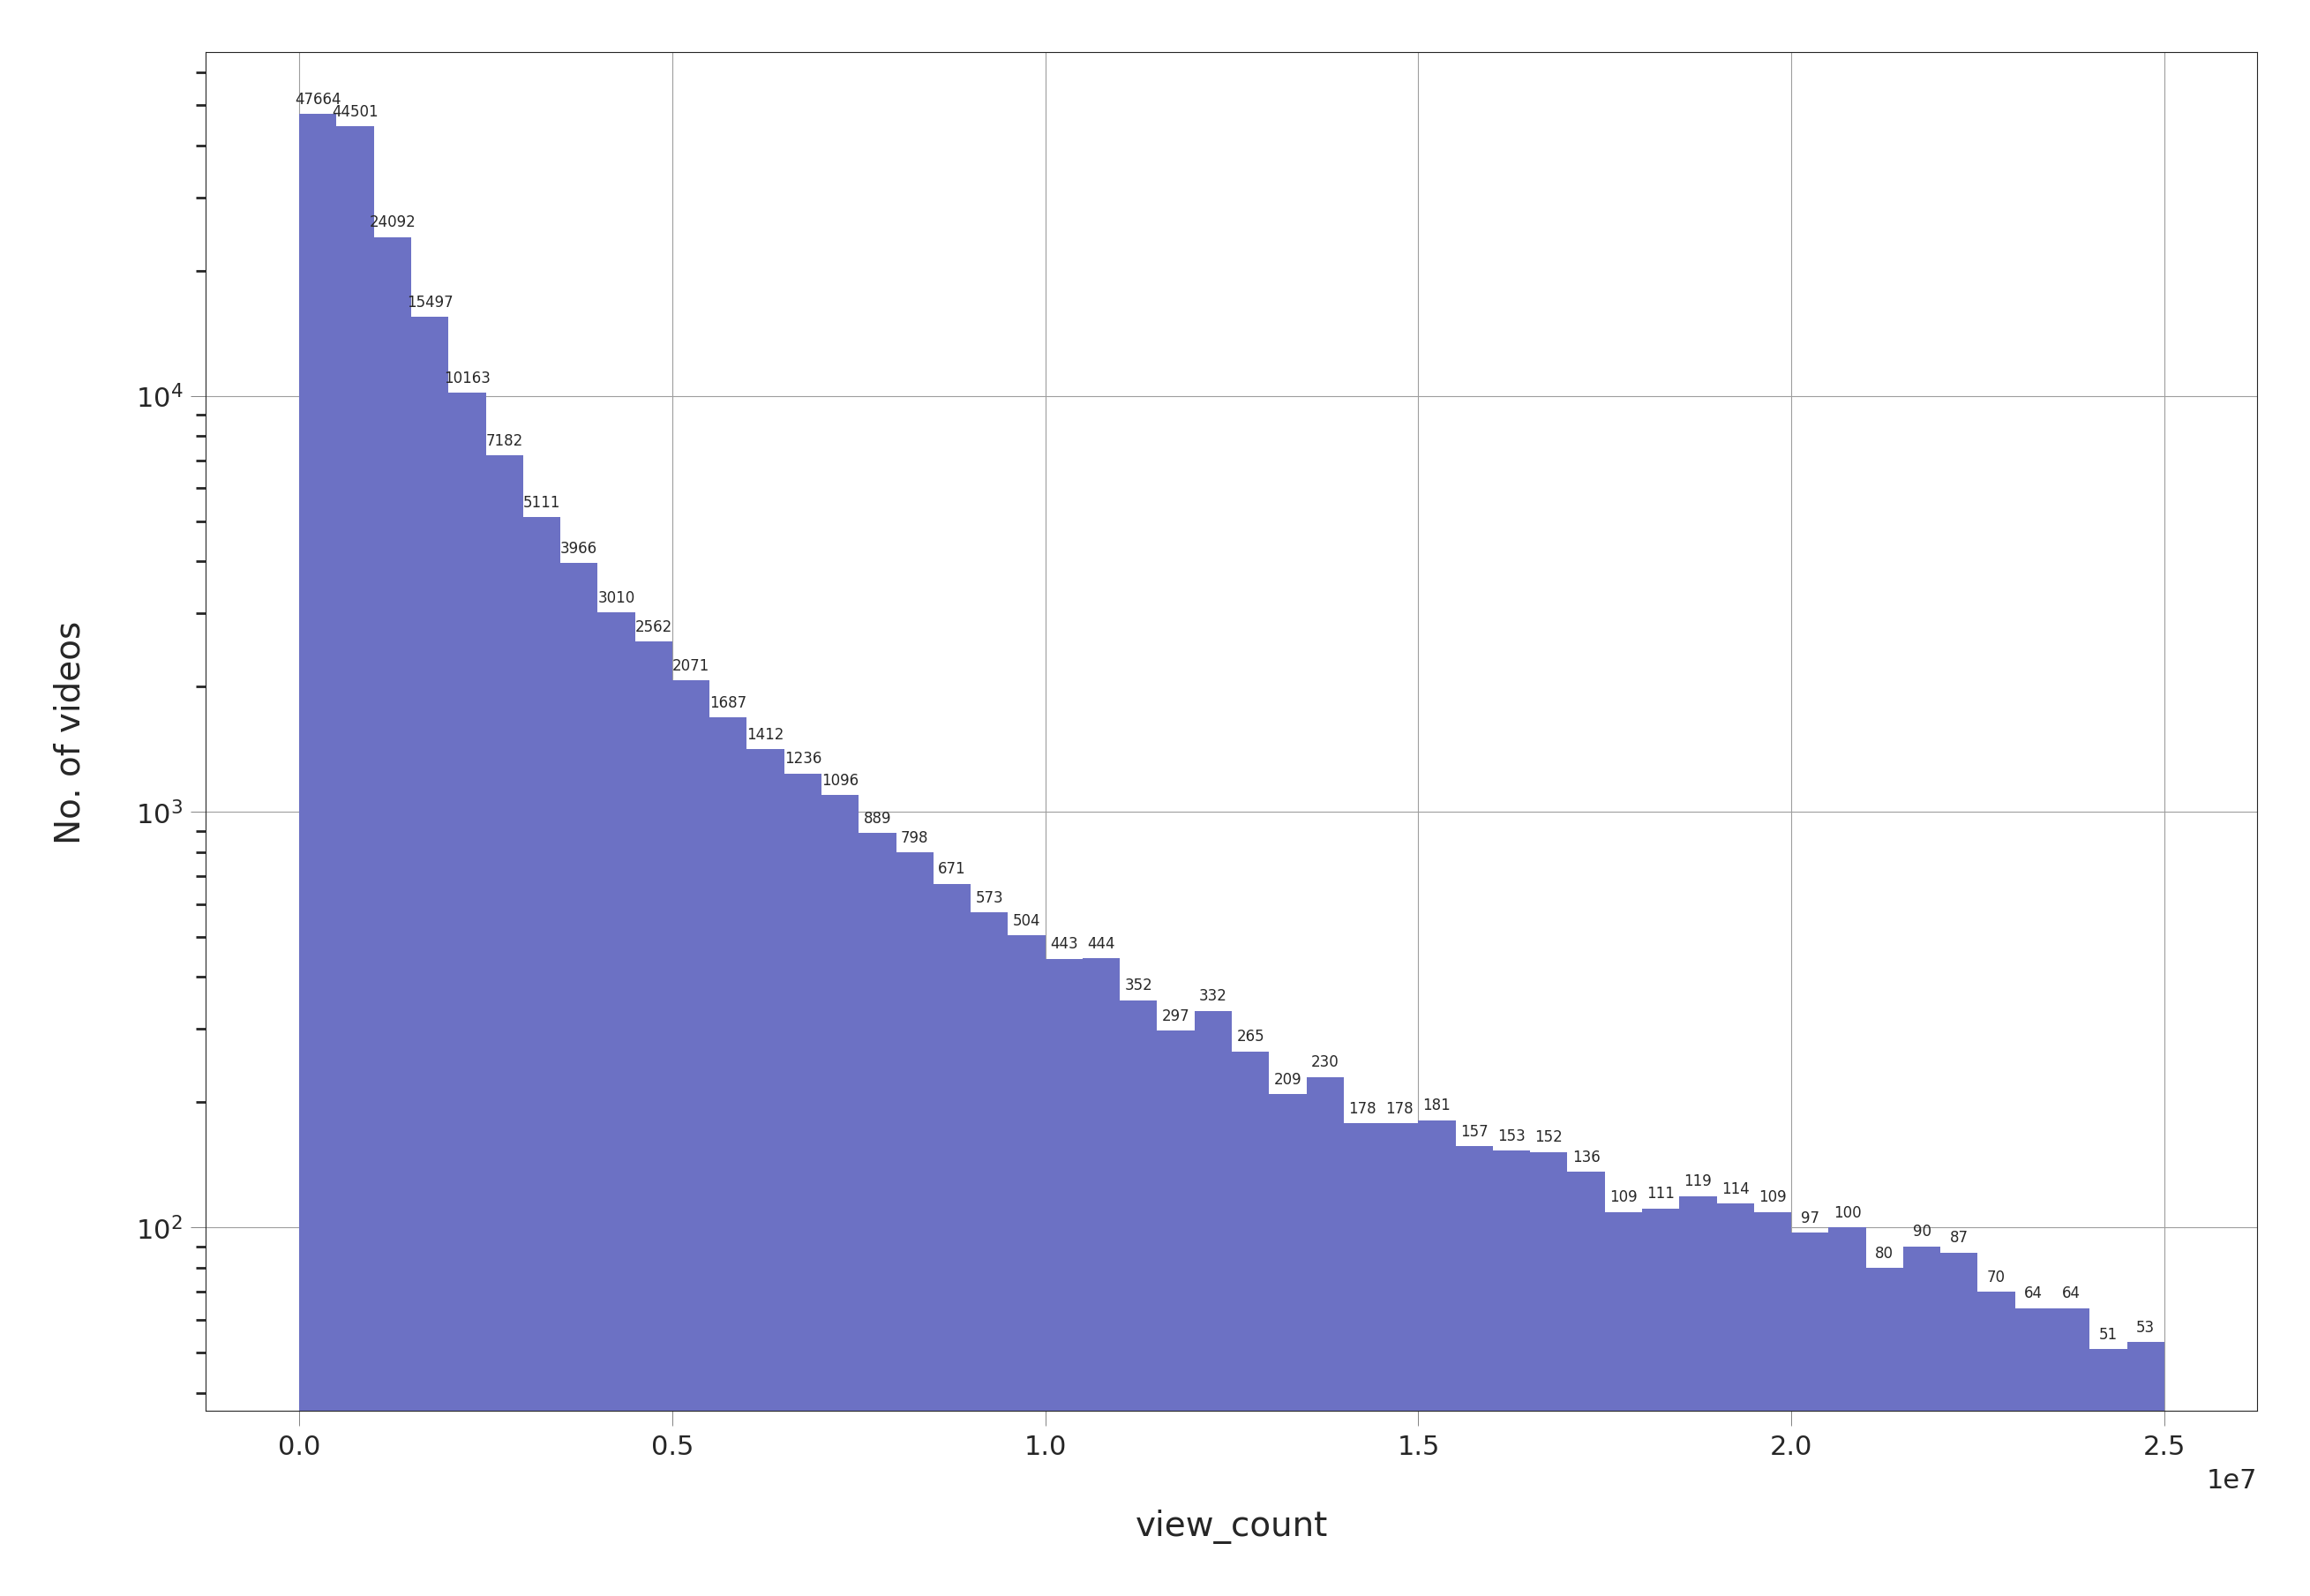

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
_ = sns.distplot(df[df["view_count"] < 25e6]["view_count"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="view_count", ylabel="No. of videos")
ax.set_yscale('log')
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)


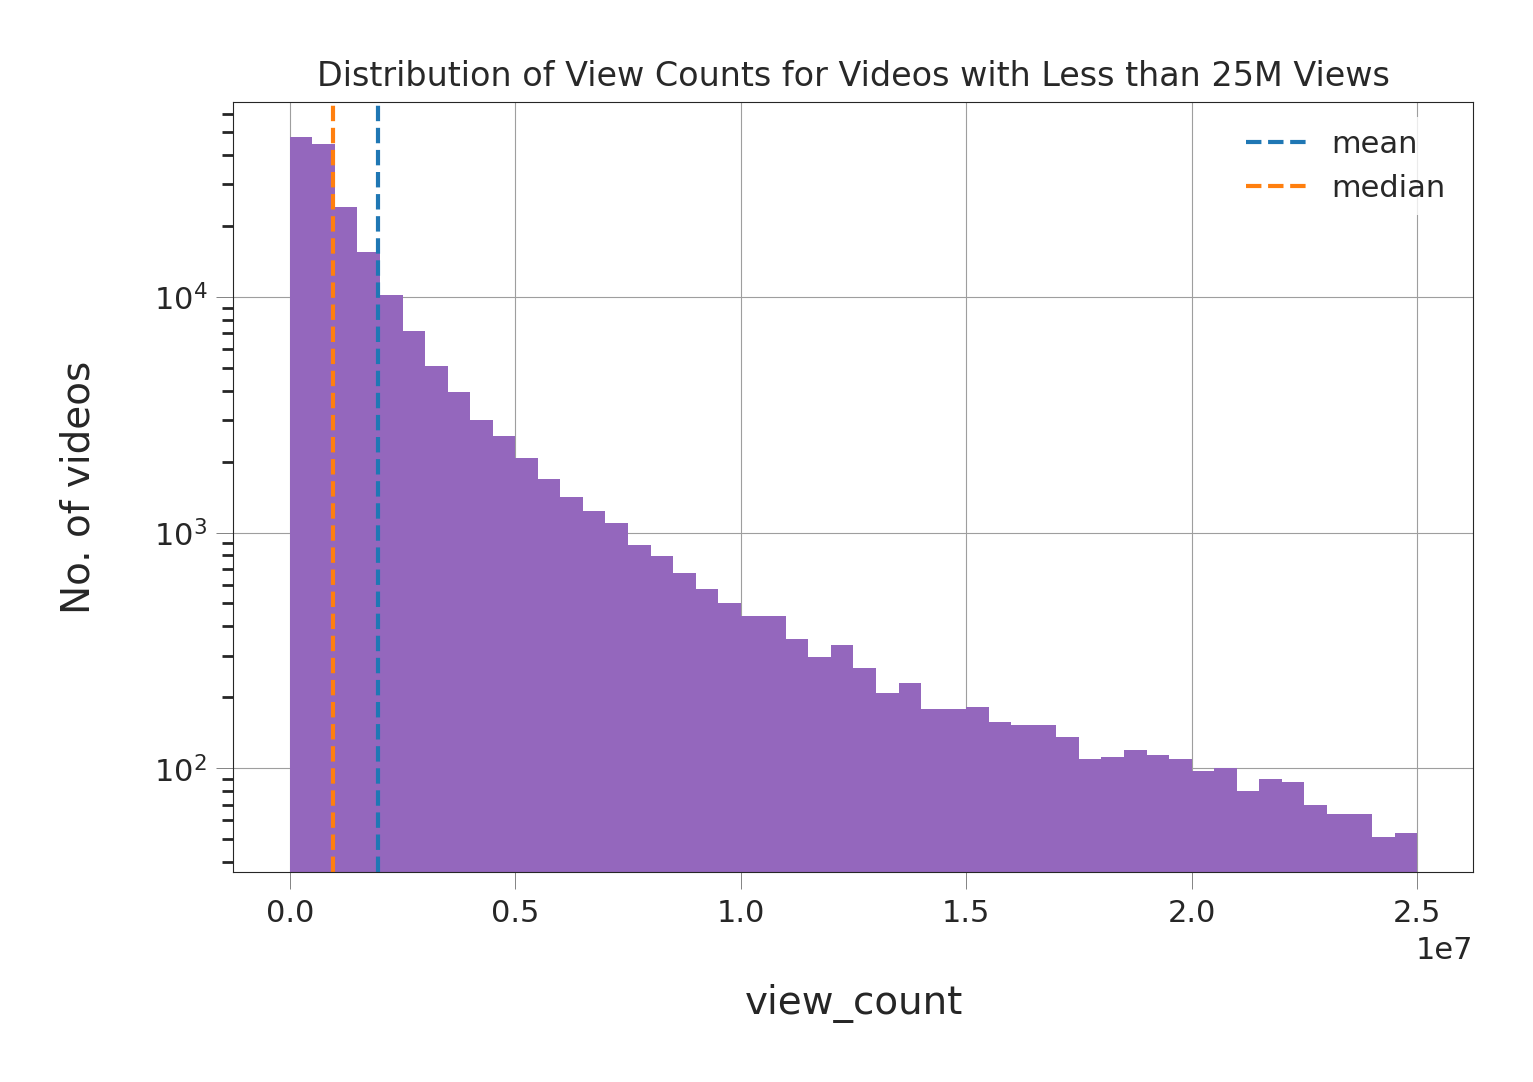

In [ ]:
# Define the plot colors
PLOT_COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the plot
fig, ax = plt.subplots()
_ = sns.distplot(df[df["view_count"] < 25e6]["view_count"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)

# Set the axis labels and title
_ = ax.set(xlabel="view_count", ylabel="No. of videos", 
           title="Distribution of View Counts for Videos with Less than 25M Views")

# Add vertical lines to show mean and median
mean = df[df["view_count"] < 25e6]["view_count"].mean()
median = df[df["view_count"] < 25e6]["view_count"].median()
_ = ax.axvline(mean, color=PLOT_COLORS[0], linestyle='--', label='mean')
_ = ax.axvline(median, color=PLOT_COLORS[1], linestyle='--', label='median')
_ = ax.legend()

# Set y-axis to log scale
_ = ax.set_yscale('log')


Now we see that the majority of trending videos have `1` million views or less. Let's see the exact percentage of videos less than `1` million views

In [ ]:
df[df['view_count'] < 1e6]['view_count'].count() / df['view_count'].count() * 100

50.703559051653

So, it is around `60%`. Similarly, we can see that the percentage of videos with less than `1.5` million views is around `71%`, and that the percentage of videos with less than `5` million views is around `91%`.

### <a name="lh"></a>Likes histogram

After `views`, we plot the histogram for `likes` column

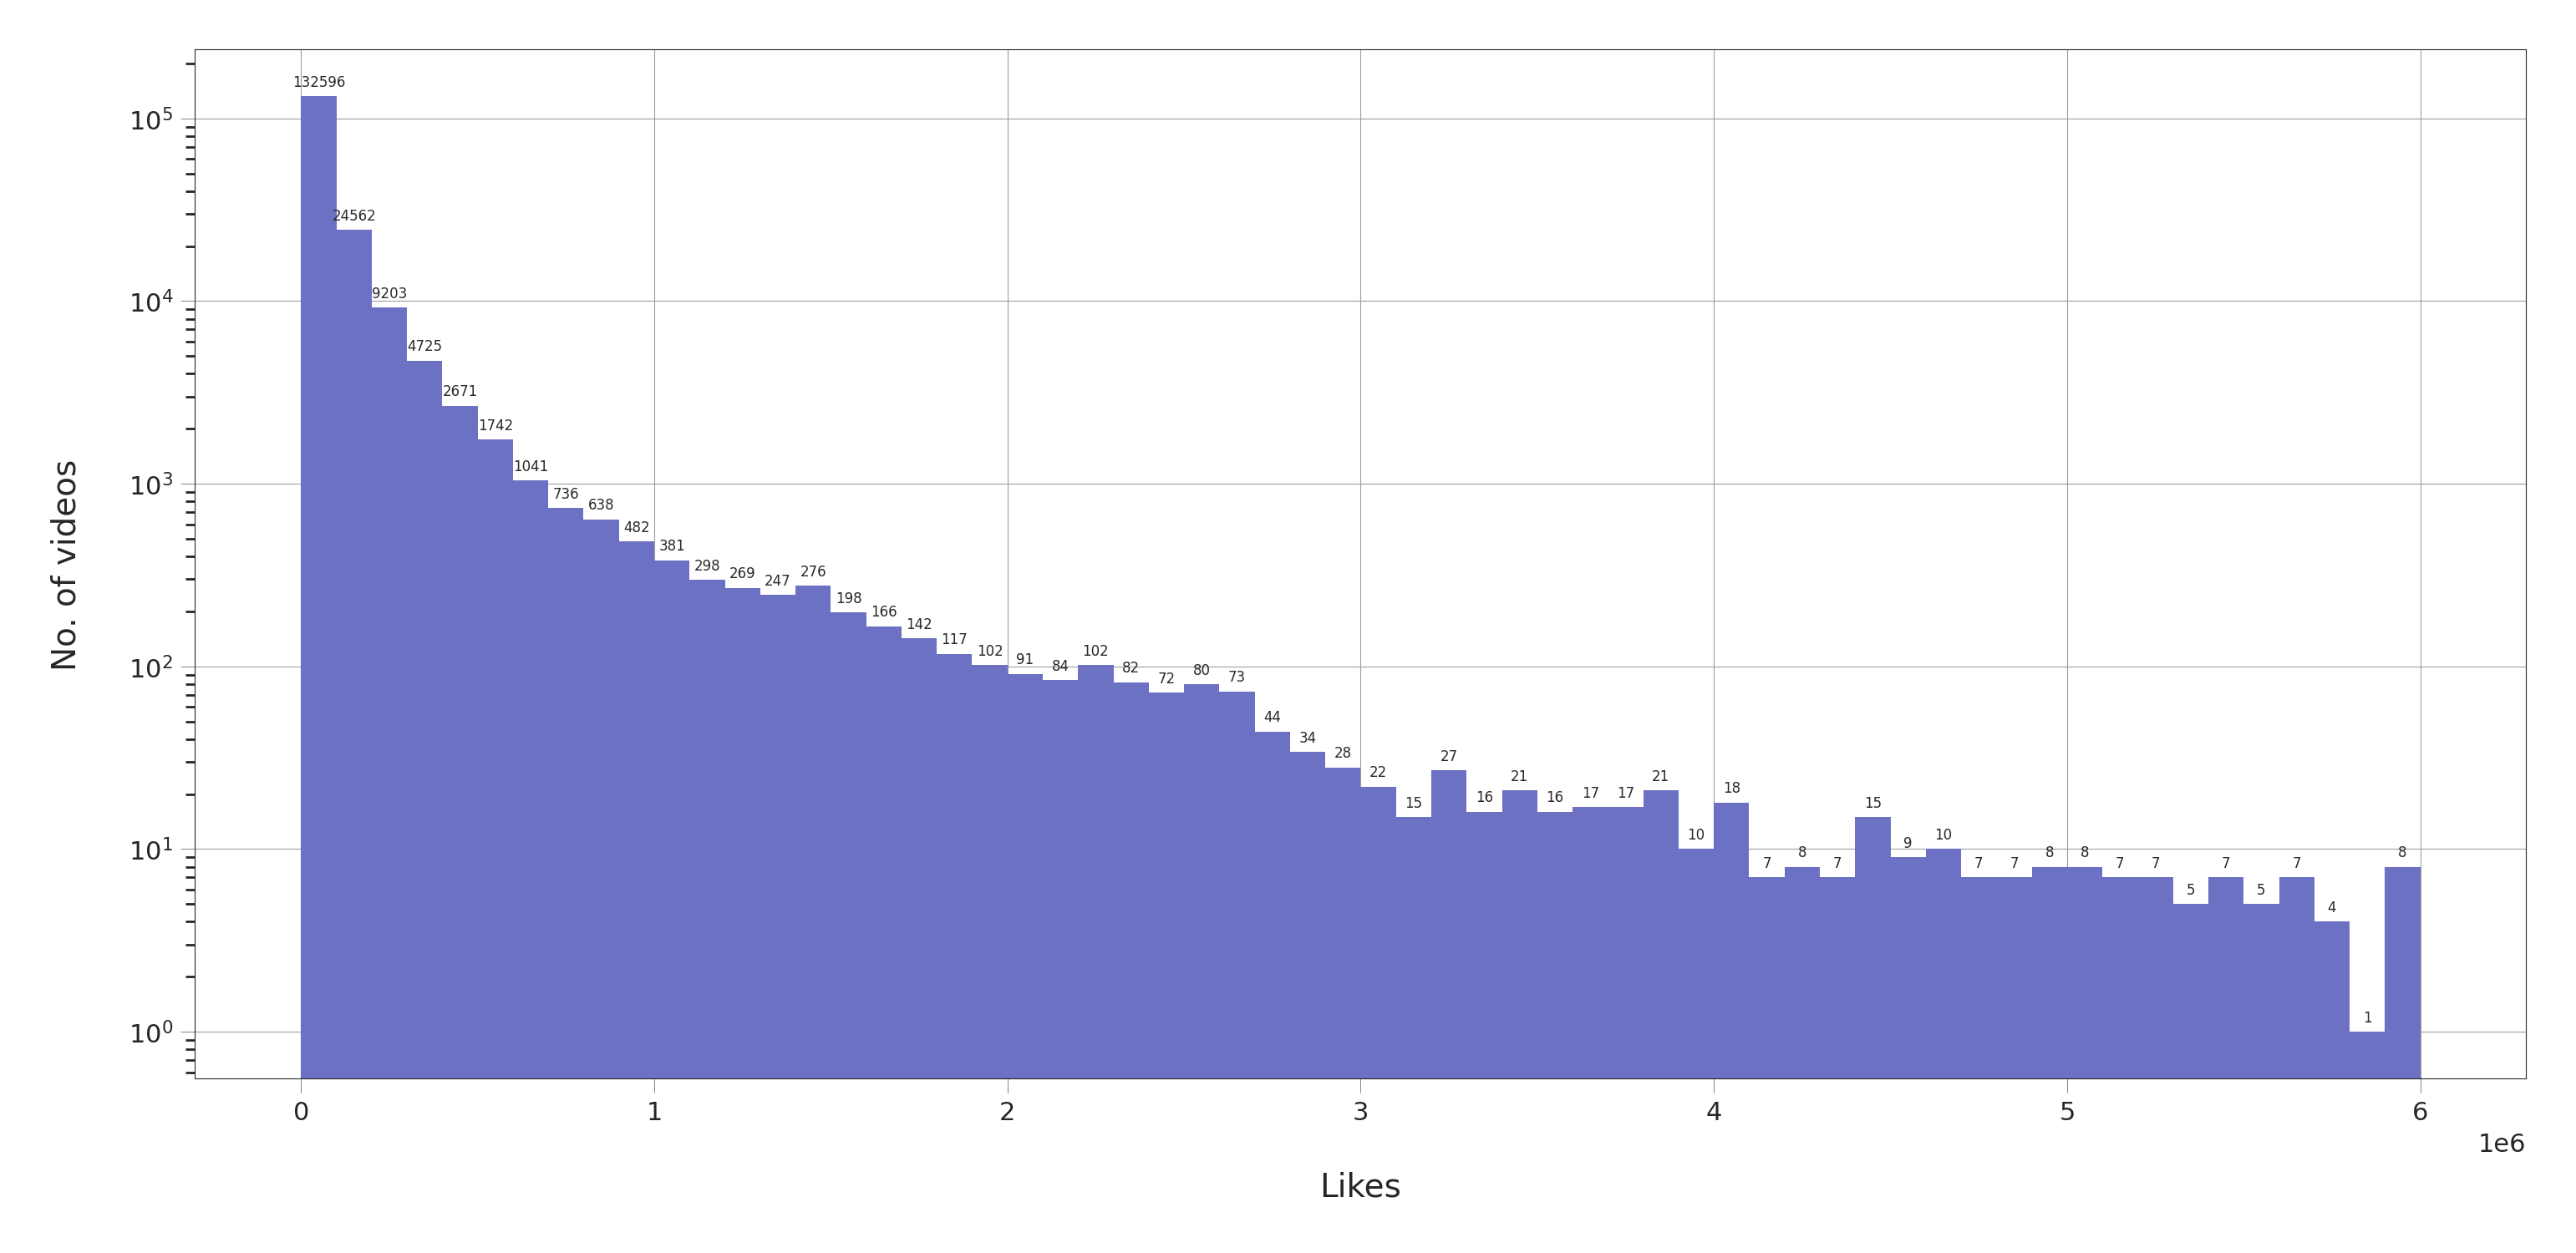

In [ ]:
# Define plot colors
PLOT_COLORS = ["#268BD2", "#D33682", "#F4A200", "#859900", "#6C71C4"]

# Clean "likes" column by removing non-numeric values
df["likes"] = pd.to_numeric(df["likes"], errors="coerce")
df = df.dropna(subset=["likes"])

# Create histogram
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots(figsize=(18,8))
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = ax.set_yscale('log')  # Change y-axis to logarithmic scale
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)


# Show plot
plt.show()


We note that the vast majority of trending videos have between `0` and `100,000` likes. Let us plot the histogram just for videos with `1000,000` likes or less to get a closer look at the distribution of the data

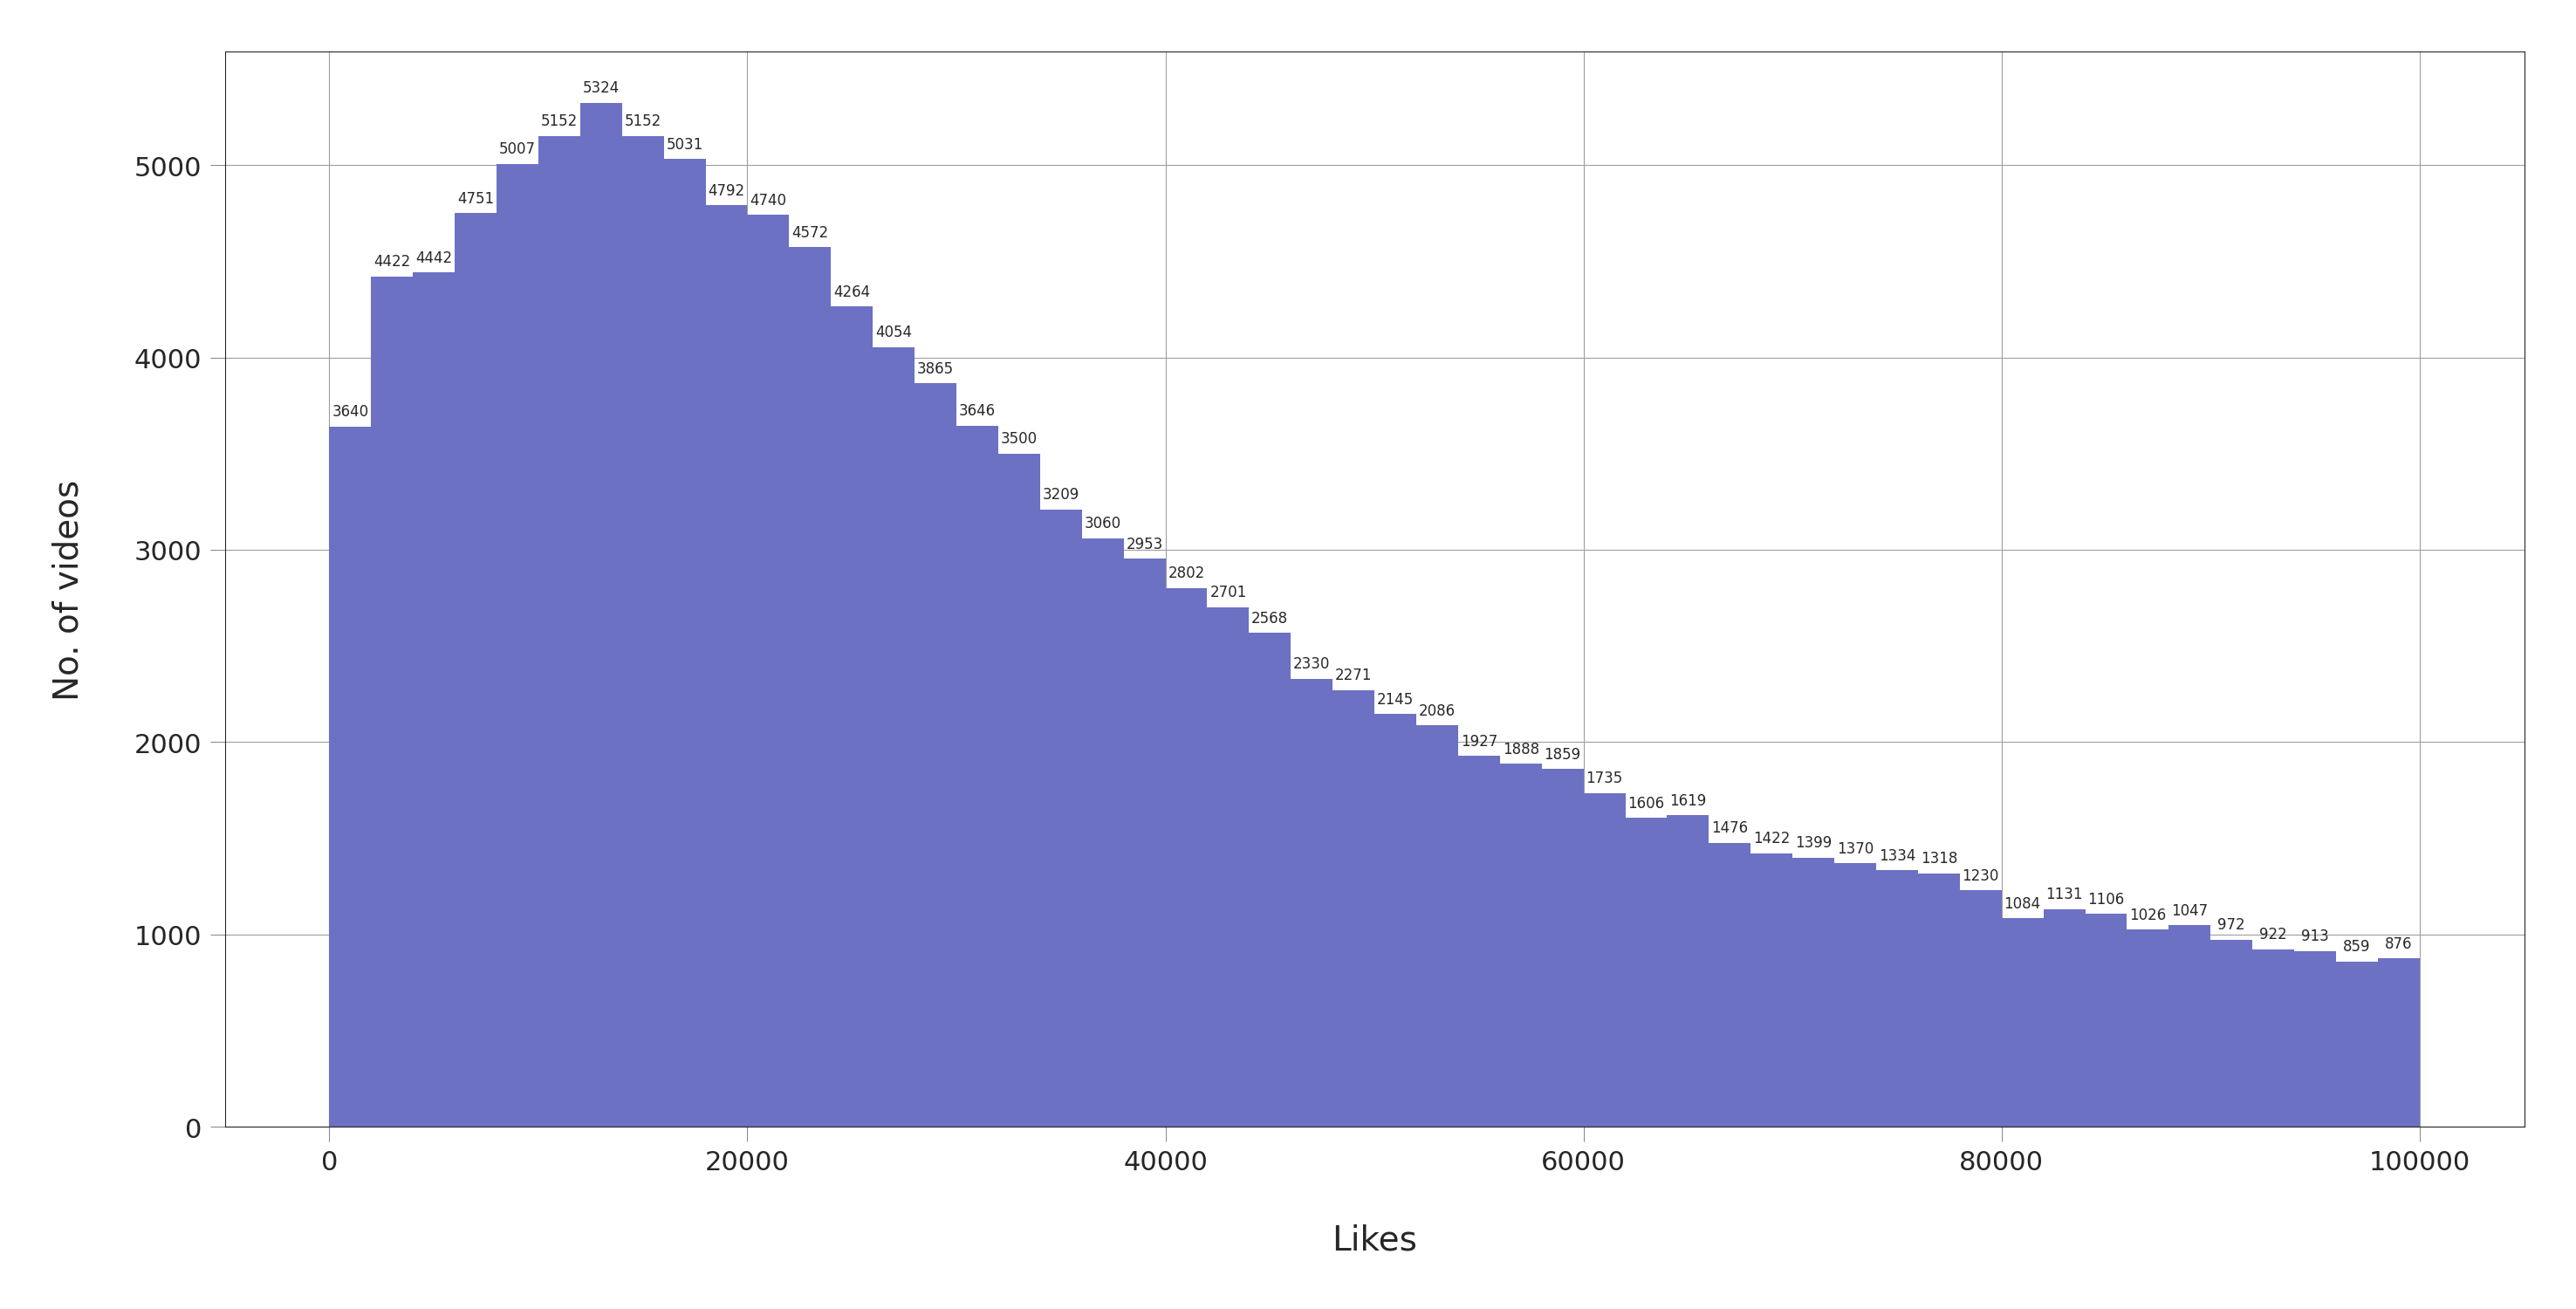

In [ ]:
fig, ax = plt.subplots(figsize=(17,8))
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)

Now we can see that the majority of trending videos have `40000` likes or less with a peak for videos with `2000` likes or less. 

Let's see the exact percentage of videos with less than `40000` likes 

In [ ]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

47.07409648495517

Similarly, we can see that the percentage of videos with less than `40,000` likes is around `47%`

### <a name="ch"></a>Comment count histogram

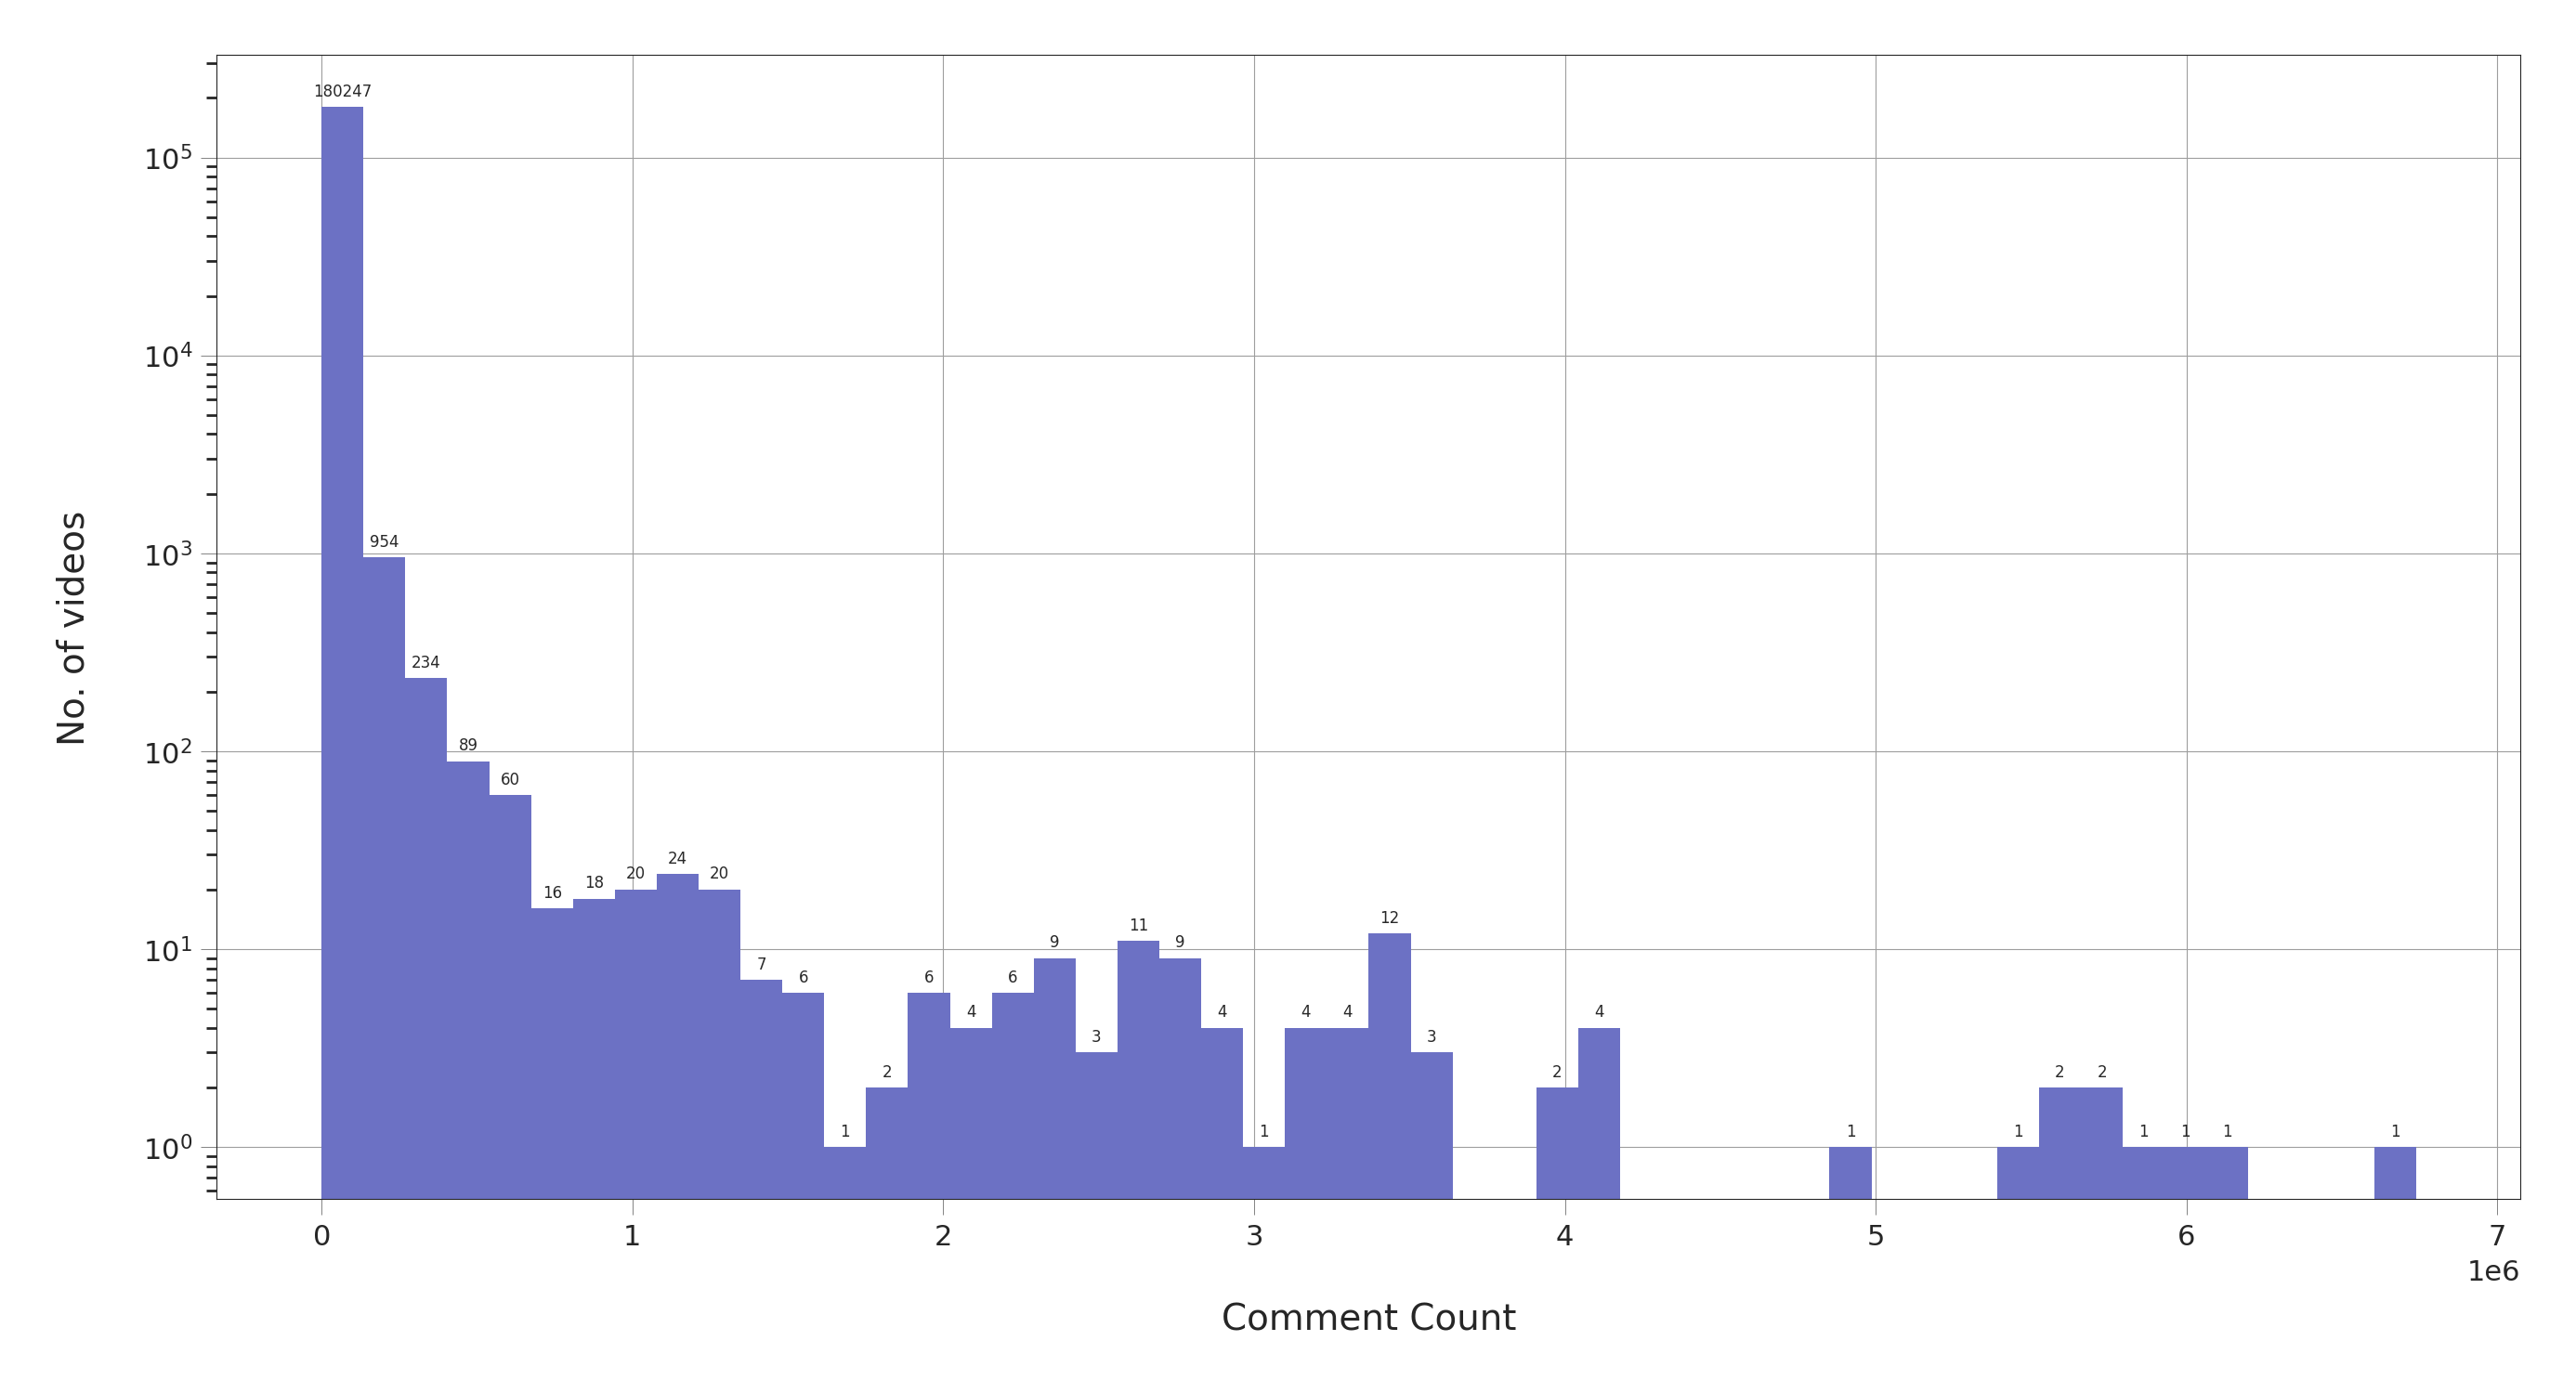

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")
ax.set_yscale('log')
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)


Let's get a closer look by eliminating entries with comment count larger than `200000` comment

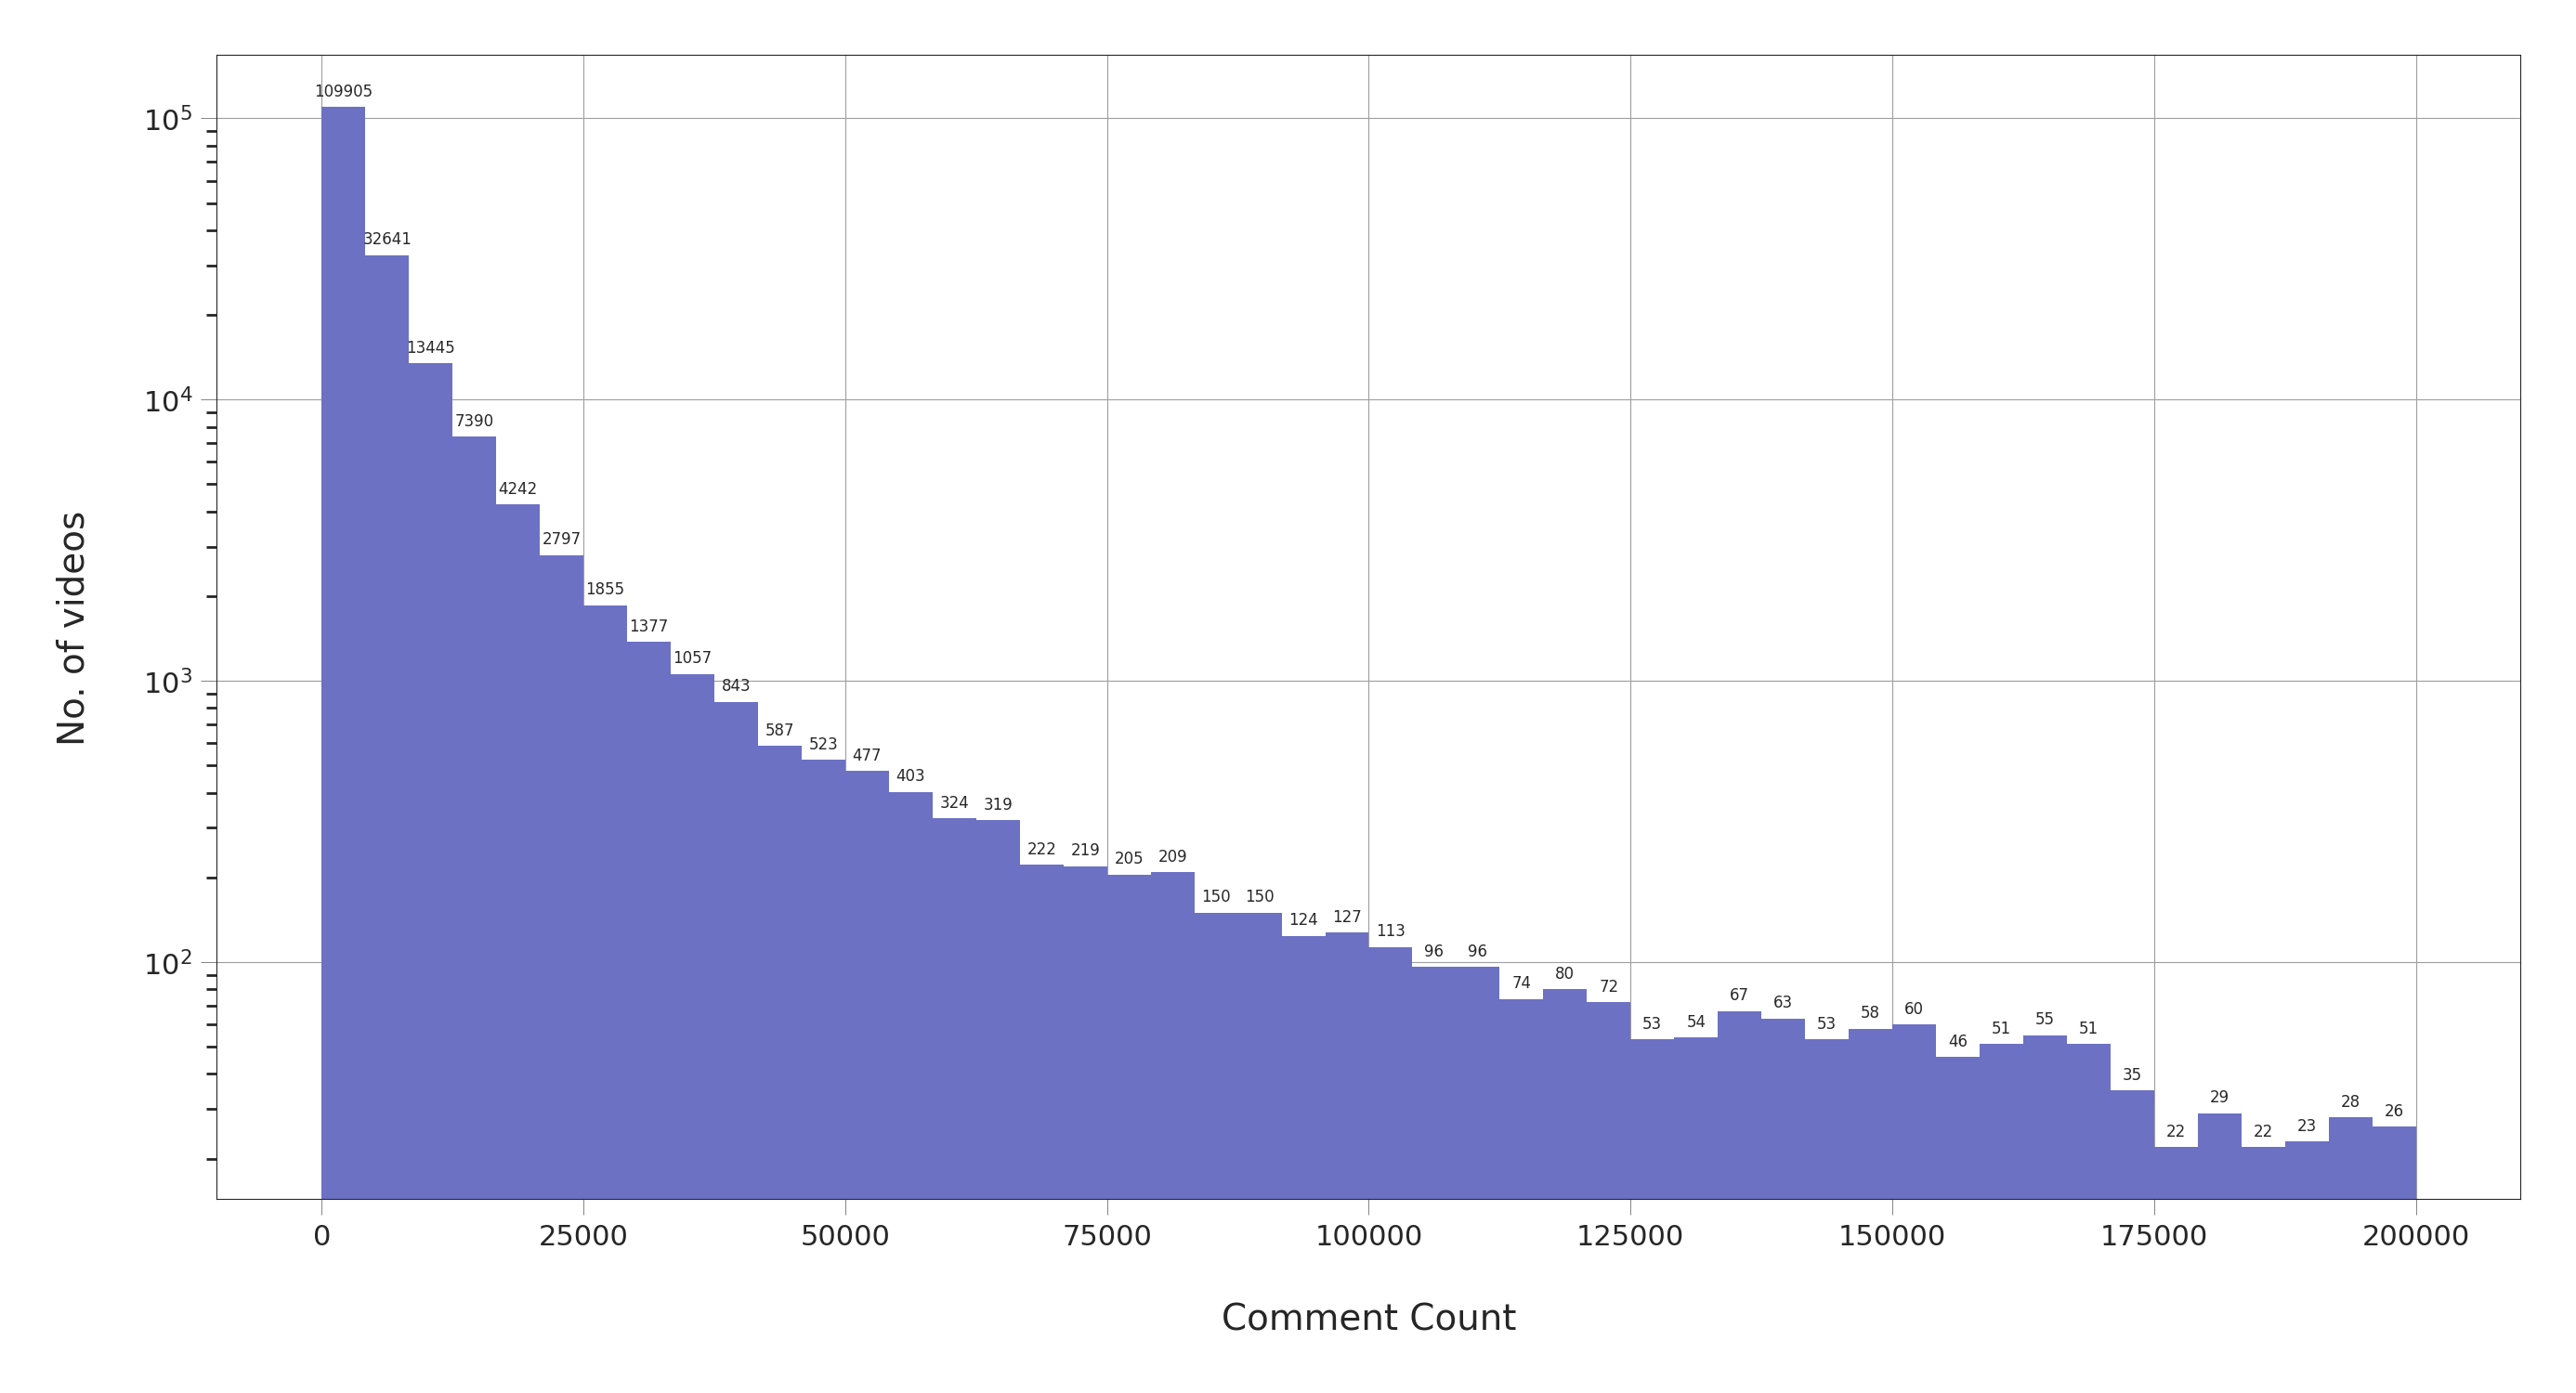

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")
_ = ax.set_yscale("log")
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)


We see that most trending videos have around

\begin{align}
\frac{25000}{6} \approx 4166 \text{ comments}
\end{align}

since each division in the graph has six histogram bins. 

As with views and likes, let's see the exact percentage of videos with less than `4000` comments

In [ ]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

59.21997909676

In a similar way, we can see that the percentage of videos with less than `4,000` comments  is around `59%`.

## <a name="descnn"></a>Description on non-numerical columns
After we described numerical columns previously, we now describe non-numerical columns

In [ ]:
df.describe(include = ['O'])

video_id             title           publishedAt  \
count        181790            181790                181790   
unique        33300             34166                 32851   
top     hdmx71UjBXs  Starlink Mission  2021-06-04T04:00:11Z   
freq             36               187                    43   

                       channelId channelTitle    tags  \
count                     181790       181790  181790   
unique                      6928         7084   23861   
top     UCDVYQ4Zhbm3S2dlz7P1GBDg          NFL  [None]   
freq                        1234         1234   29571   

                                        thumbnail_link description  \
count                                           181790      181790   
unique                                           33300       34053   
top     https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg               
freq                                                36        4017   

       publishing_year publishing_day publishing_hour  
count           181790         181790          181790  
unique               4              7               1  
top               2021            Thu              00  
freq             74595          26400          181790

From the table above, we can see that there are `205` unique dates, which means that our dataset contains collected data about trending videos over **`205`** days.

From `video_id` description, we can see that there are `40949` videos (which is expected because our dataset contains `40949` entries), but we can see also that there are only `6351` unique videos which means that some videos appeared on the trending videos list **on more than one day**.
The table also tells us that the top frequent title is `WE MADE OUR MOM CRY...HER DREAM CAME TRUE!` and that it appeared `30` times on the trending videos list.

But there is something strange in the description table above: Because there are `6351` unique video IDs, we expect to have `6351` unique video titles also, because we assume that each ID is linked to a corresponding title. One possible interpretation is that a trending video had some title when it appeared on the trending list, then it appeared again on another day but with a modified title. Similar explaination applies for `description` column as well.
For `publish_time` column, the unique values are less than `6351`, but there is nothing strange here, because two different videos may be published at the same time.

To verify our interpretation for `title` column, let's take a look at an example where a trending video appeared more than once on the trending list but with different titles

In [ ]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

video_id                               title           publishedAt  \
60792  --14w5SOEUs                   Migos - Avalanche  2021-06-10T16:00:00Z   
60991  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-10T16:00:00Z   
61197  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-10T16:00:00Z   
61398  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-10T16:00:00Z   
61605  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-10T16:00:00Z   
61818  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-10T16:00:00Z   
62030  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-10T16:00:00Z   
62243  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-10T16:00:00Z   
62481  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-10T16:00:00Z   
62681  --14w5SOEUs  Migos - Avalanche (Official Video)  2021-06-10T16:00:00Z   

                      channelId channelTitle  categoryId  \
60792  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO          10   
60991  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO          10   
61197  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO          10   
61398  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO          10   
61605  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO          10   
61818  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO          10   
62030  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO          10   
62243  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO          10   
62481  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO          10   
62681  UCGIelM2Dj3zza3xyV3pL3WQ    MigosVEVO          10   

                                                    tags  view_count   likes  \
60792  Migos|Avalanche|Quality|Control|Music/Motown|R...     1076217  122830   
60991  Migos|Avalanche|Quality|Control|Music/Motown|R...     2146104  167034   
61197  Migos|Avalanche|Quality|Control|Music/Motown|R...     3317372  202153   
61398  Migos|Avalanche|Quality|Control|Music/Motown|R...     3963014  218568   
61605  Migos|Avalanche|Quality|Control|Music/Motown|R...     4690242  232455   
61818  Migos|Avalanche|Quality|Control|Music/Motown|R...     5167987  240113   
62030  Migos|Avalanche|Quality|Control|Music/Motown|R...     5726392  247336   
62243  Migos|Avalanche|Quality|Control|Music/Motown|R...     6078723  252005   
62481  Migos|Avalanche|Quality|Control|Music/Motown|R...     6553613  258885   
62681  Migos|Avalanche|Quality|Control|Music/Motown|R...     6823249  262692   

       dislikes  comment_count  \
60792       867           9539   
60991      1755          12998   
61197      2518          14721   
61398      2847          15442   
61605      3145          15743   
61818      3414          16241   
62030      3627          15890   
62243      3778          16228   
62481      3977          16296   
62681      4107          16445   

                                       thumbnail_link  comments_disabled  \
60792  https://i.ytimg.com/vi/--14w5SOEUs/default.jpg              False   
60991  https://i.ytimg.com/vi/--14w5SOEUs/default.jpg              False   
61197  https://i.ytimg.com/vi/--14w5SOEUs/default.jpg              False   
61398  https://i.ytimg.com/vi/--14w5SOEUs/default.jpg              False   
61605  https://i.ytimg.com/vi/--14w5SOEUs/default.jpg              False   
61818  https://i.ytimg.com/vi/--14w5SOEUs/default.jpg              False   
62030  https://i.ytimg.com/vi/--14w5SOEUs/default.jpg              False   
62243  https://i.ytimg.com/vi/--14w5SOEUs/default.jpg              False   
62481  https://i.ytimg.com/vi/--14w5SOEUs/default.jpg              False   
62681  https://i.ytimg.com/vi/--14w5SOEUs/default.jpg              False   

       ratings_disabled                                        description  \
60792             False  Music video by Migos performing Avalanche. Qua...   
60991             False  Watch the the official video for Migos - Avala...   
61197             False  Watch the the official video for Migos - Avala...   
61398             False  Watch the the official video for Migos

We can see that this video appeared on the list with two different titles.

## <a name="cap"></a>How many trending video titles contain capitalized word?
Now we want to see how many trending video titles contain at least a capitalized word (e.g. HOW). To do that, we will add a new variable (column) to the dataset whose value is `True` if the video title has at least a capitalized word in it, and `False` otherwise

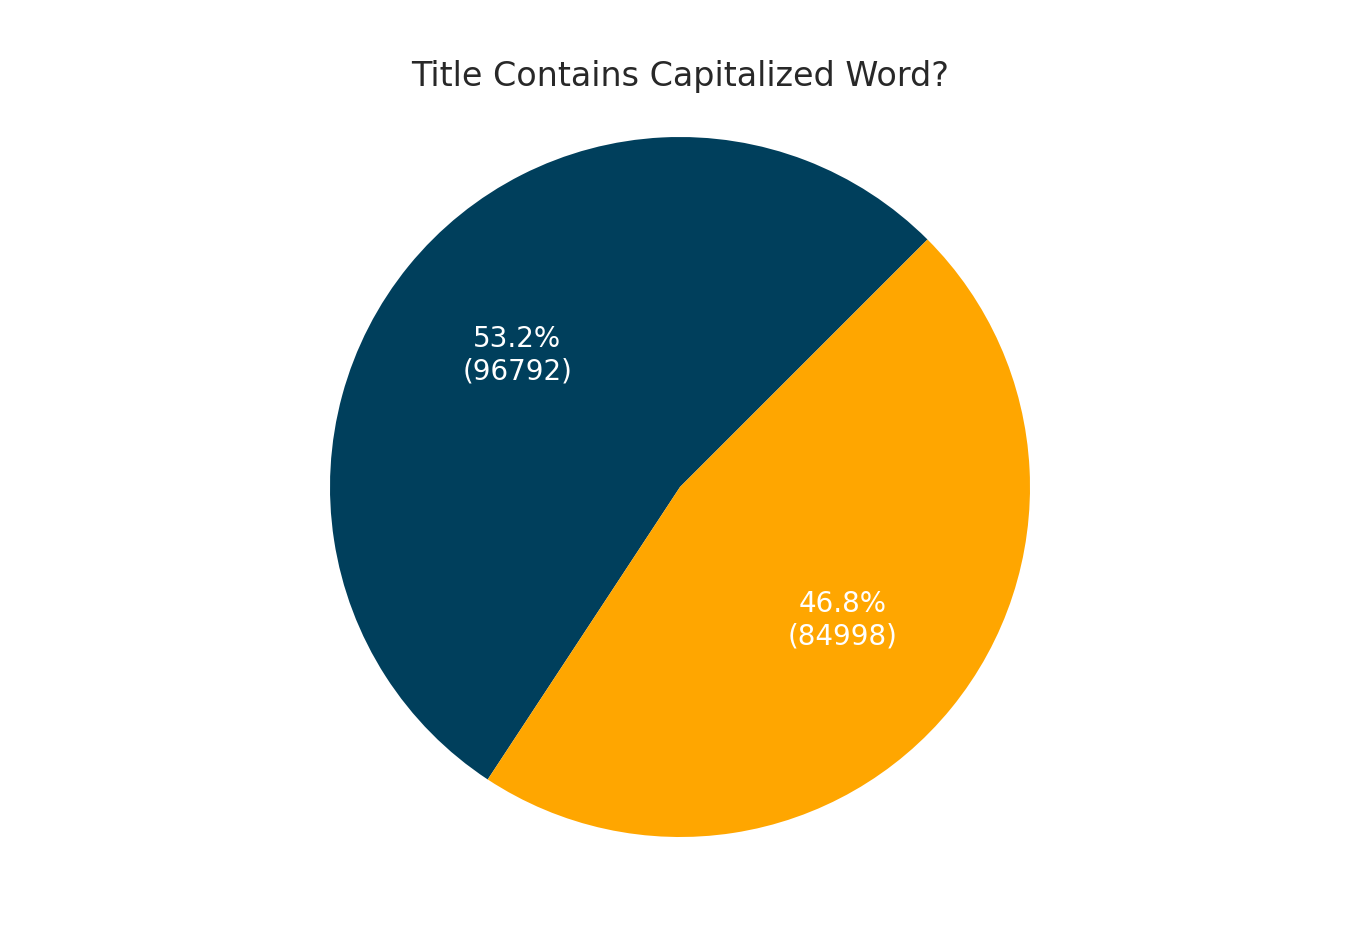

In [ ]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)
value_counts = df["contains_capitalized"].value_counts()
fig, ax = plt.subplots()
_ = ax.pie(value_counts, labels=value_counts.index.map({False: 'No', True: 'Yes'}),
           colors=['#003f5c', '#ffa600'], textprops={'color': 'white'},
           autopct=lambda pct: f"{pct:.1f}%\n({pct/100*value_counts.sum():.0f})",
           startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [ ]:
df["contains_capitalized"].value_counts(normalize=True)

True    0.53
False   0.47
Name: contains_capitalized, dtype: float64

We can see that 44% of trending video titles contain at least a capitalized word. We will later use this added new column `contains_capitalized` in analyzing correlation between variables.

## <a name="len"></a>Video title lengths
Let's add another column to our dataset to represent the length of each video title, then plot the histogram of title length to get an idea about the lengths of trnding video titles

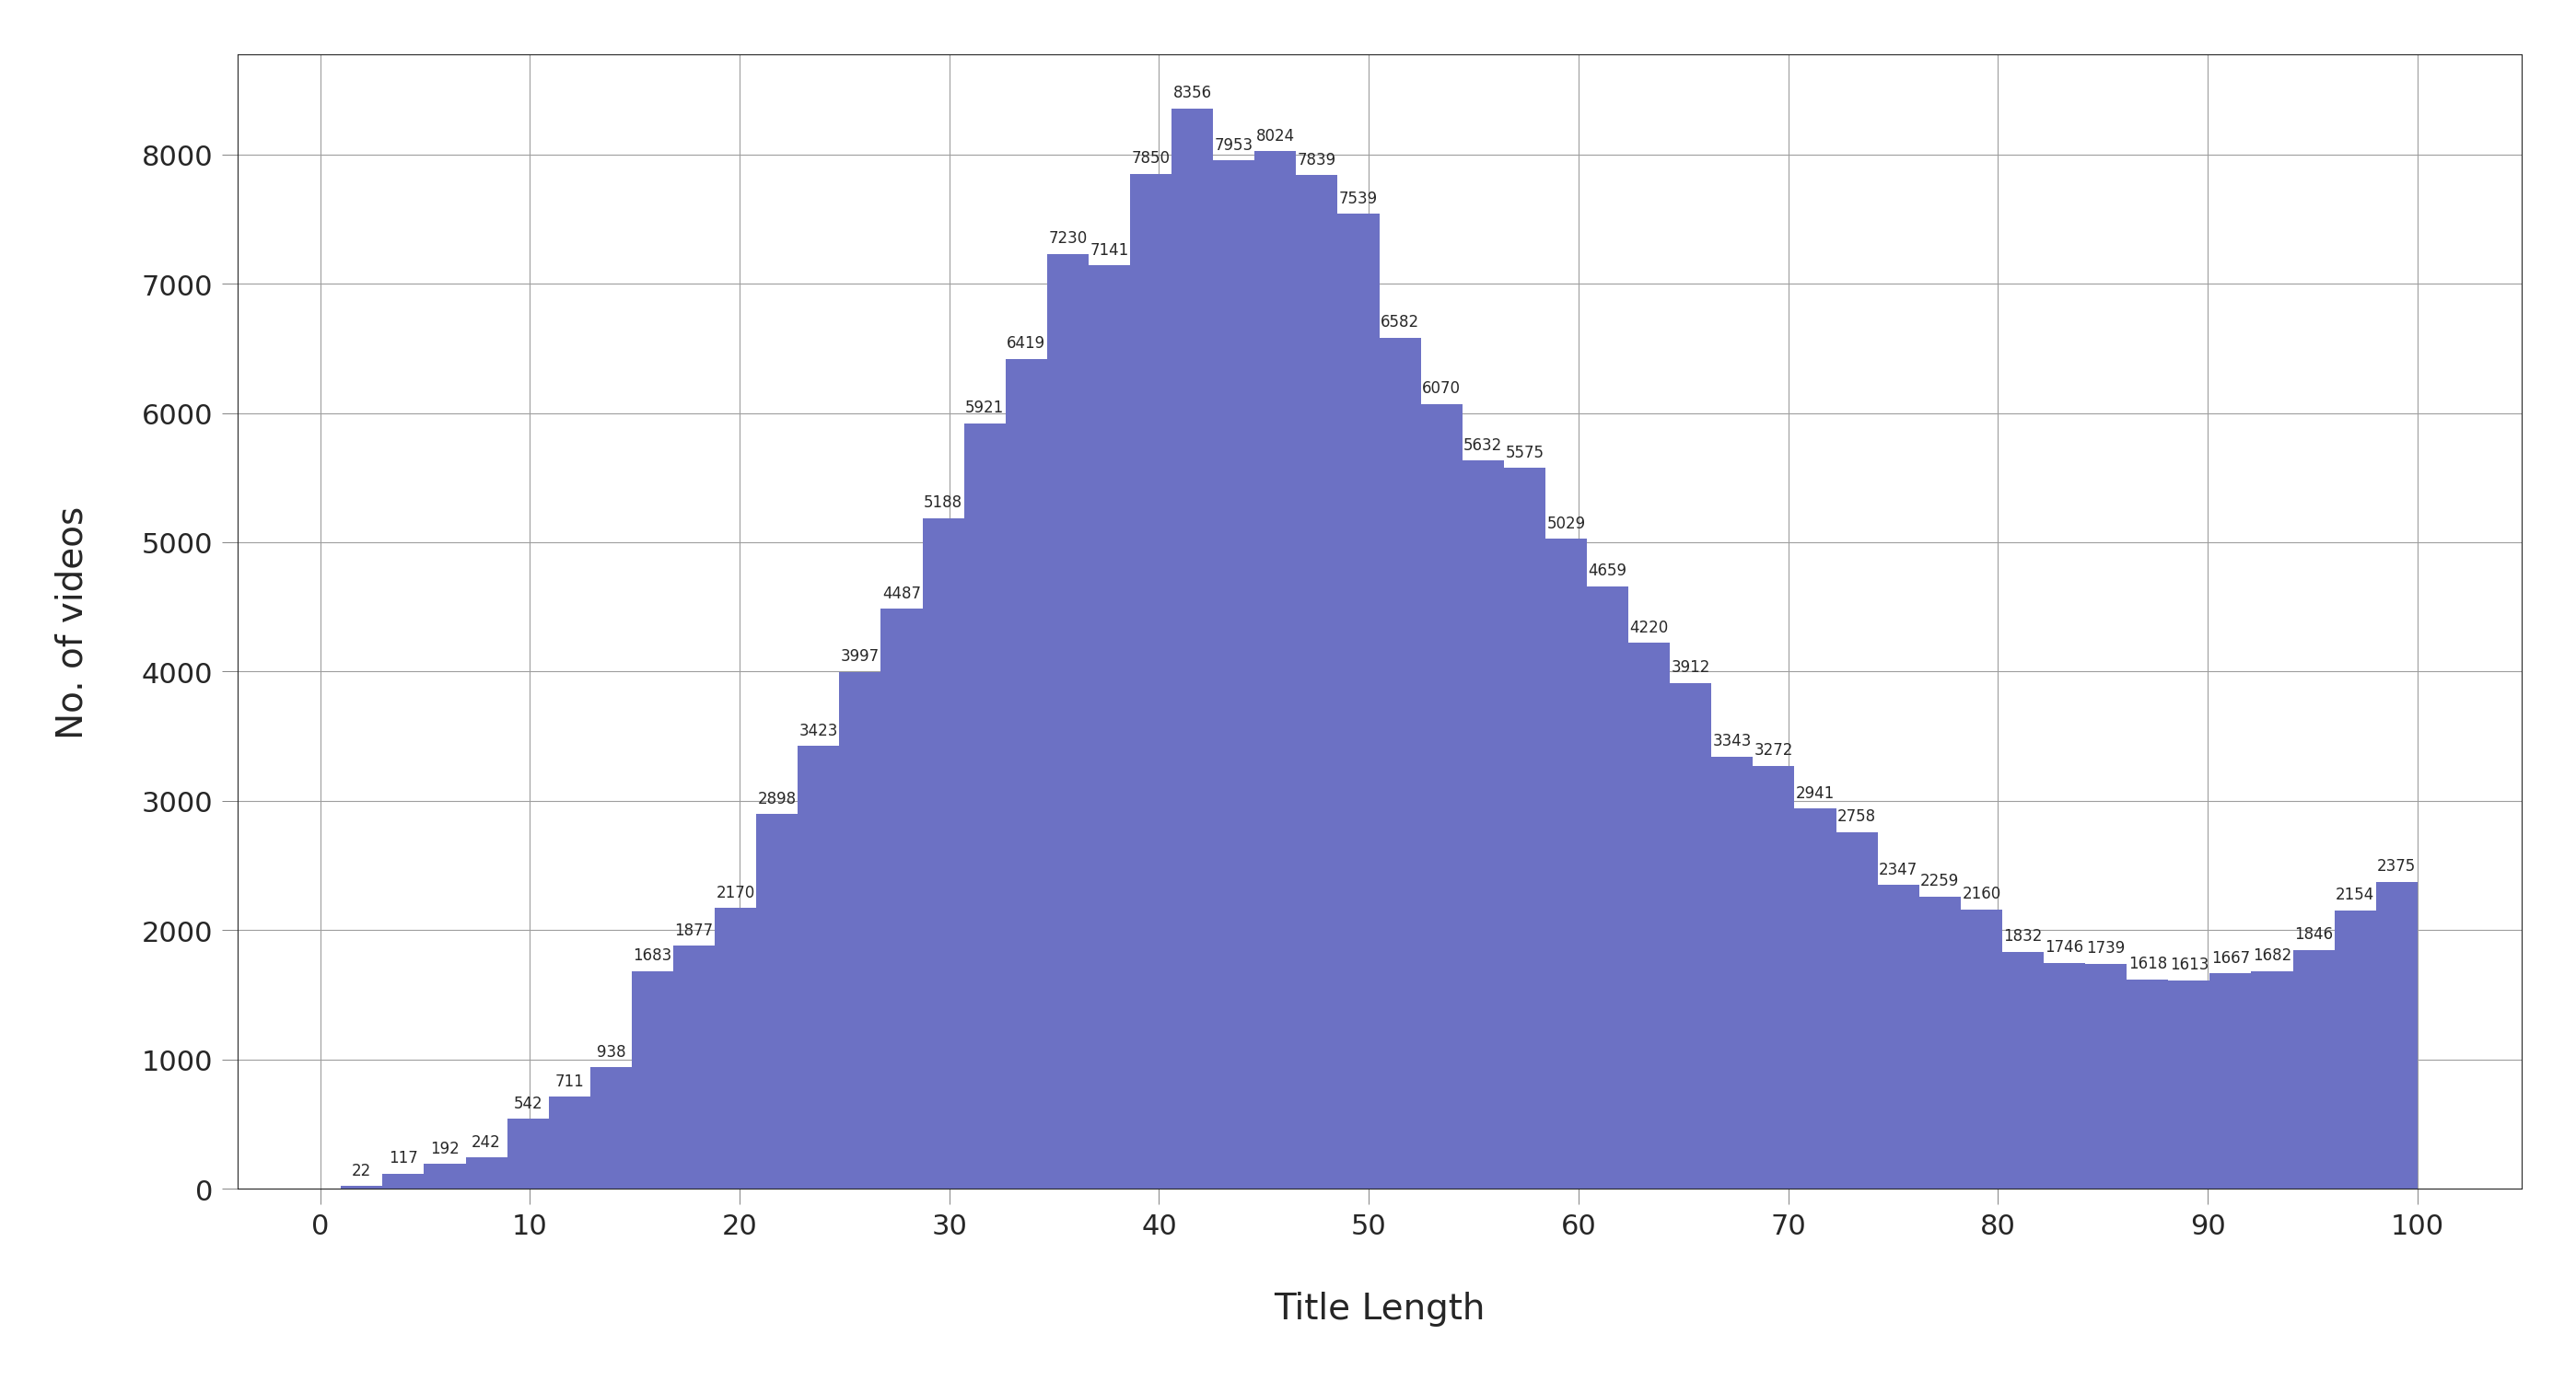

In [ ]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize=(16,8))
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=6)

We can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 30 and 60 character approximately.

Now let's draw a [scatter plot](https://www.mathsisfun.com/data/scatter-xy-plots.html) between title length and number of views to see the relationship between these two variables

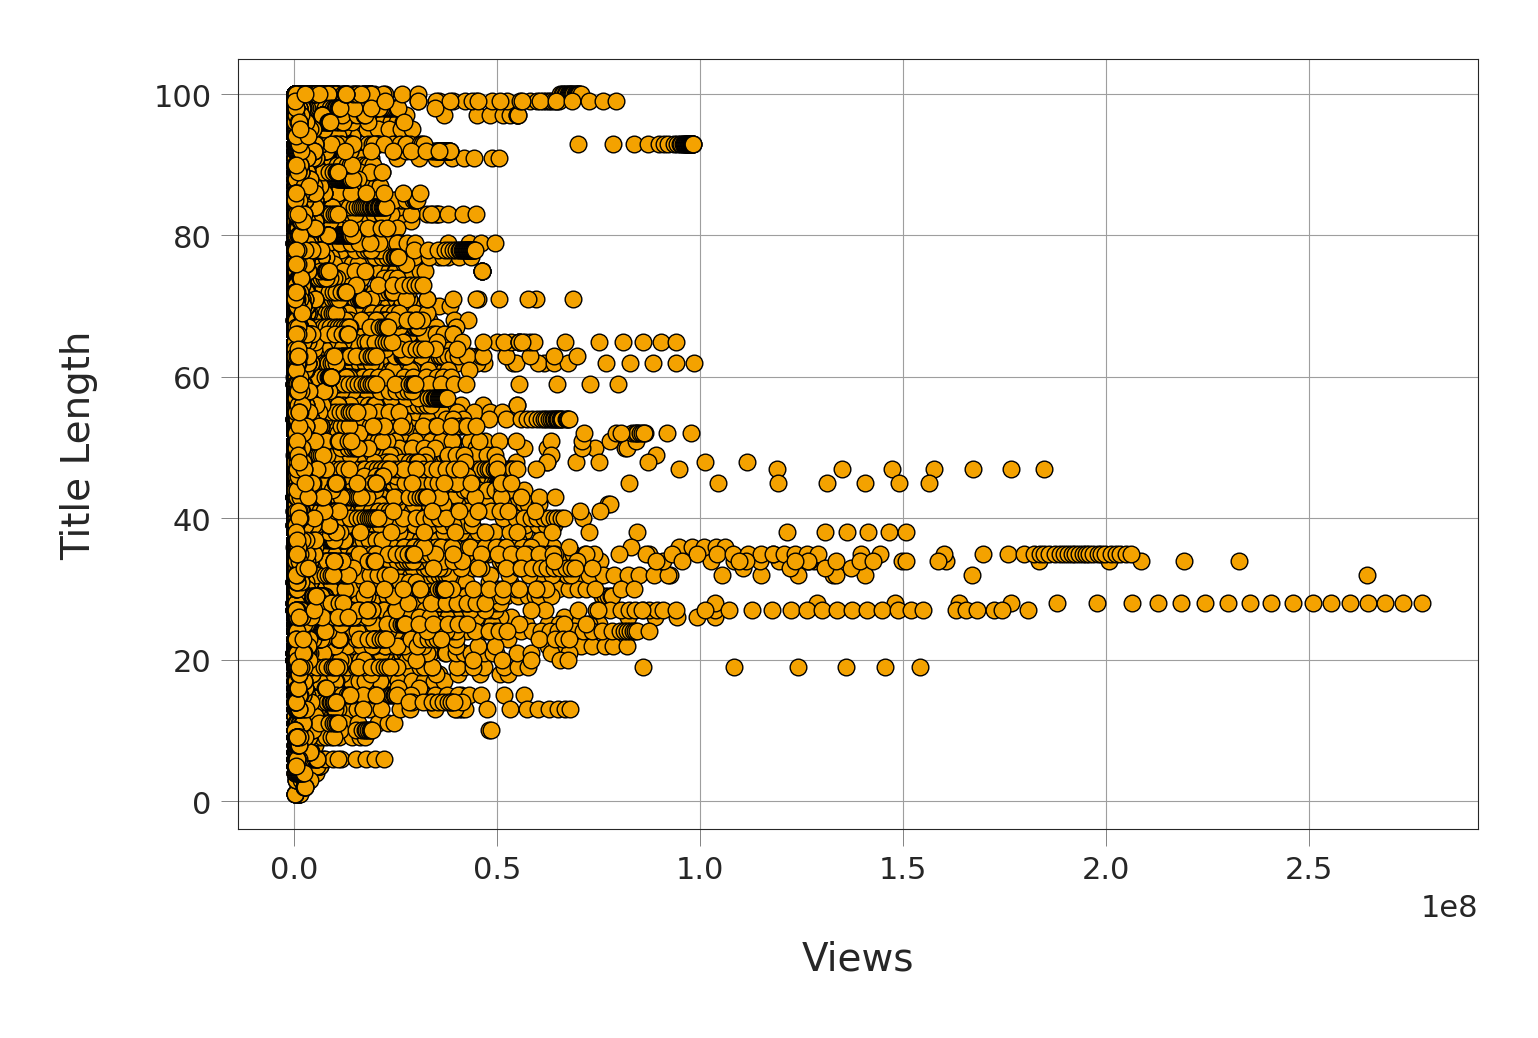

In [ ]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['view_count'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

By looking at the scatter plot, we can say that there is no relationship between the title length and the number of views. However, we notice an interesting thing: videos that have `100,000,000` views and more have title length between `33` and `55` characters approximately.

## <a name="corr"></a>Correlation between dataset variables
Now let's see how the dataset variables are [correlated](https://www.mathsisfun.com/data/correlation.html) with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

Correlation is represented as a value between `-1` and `+1` where `+1` denotes the highest positive correlation, `-1` denotes the highest negative correlation, and `0` denotes that there is no correlation.

Let's see the correlation table between our dataset variables (numerical and boolean variables only)

In [ ]:
df.corr()

categoryId  view_count  likes  dislikes  comment_count  \
categoryId                  1.00       -0.05  -0.08     -0.03          -0.06   
view_count                 -0.05        1.00   0.86      0.54           0.60   
likes                      -0.08        0.86   1.00      0.52           0.74   
dislikes                   -0.03        0.54   0.52      1.00           0.44   
comment_count              -0.06        0.60   0.74      0.44           1.00   
comments_disabled           0.07        0.01  -0.02      0.01          -0.02   
ratings_disabled            0.00        0.01  -0.02     -0.01          -0.00   
contains_capitalized       -0.02       -0.01   0.02     -0.01           0.04   
title_length               -0.03       -0.04  -0.09     -0.03          -0.04   

                      comments_disabled  ratings_disabled  \
categoryId                         0.07              0.00   
view_count                         0.01              0.01   
likes                             -0.02             -0.02   
dislikes                           0.01             -0.01   
comment_count                     -0.02             -0.00   
comments_disabled                  1.00              0.19   
ratings_disabled                   0.19              1.00   
contains_capitalized              -0.01             -0.01   
title_length                       0.04             -0.01   

                      contains_capitalized  title_length  
categoryId                           -0.02         -0.03  
view_count                           -0.01         -0.04  
likes                                 0.02         -0.09  
dislikes                             -0.01         -0.03  
comment_count                         0.04         -0.04  
comments_disabled                    -0.01          0.04  
ratings_disabled                     -0.01         -0.01  
contains_capitalized                  1.00          0.15  
title_length                          0.15          1.00

We see for example that views and likes are highly positively correlated with a correlation value of `0.85`; we see also a high positive correlation (`0.80`) between likes and comment count, and between dislikes and comment count (`0.70`). 

There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

Now let's visualize the correlation table above using a [heatmap](https://www.wikiwand.com/en/Heat_map)

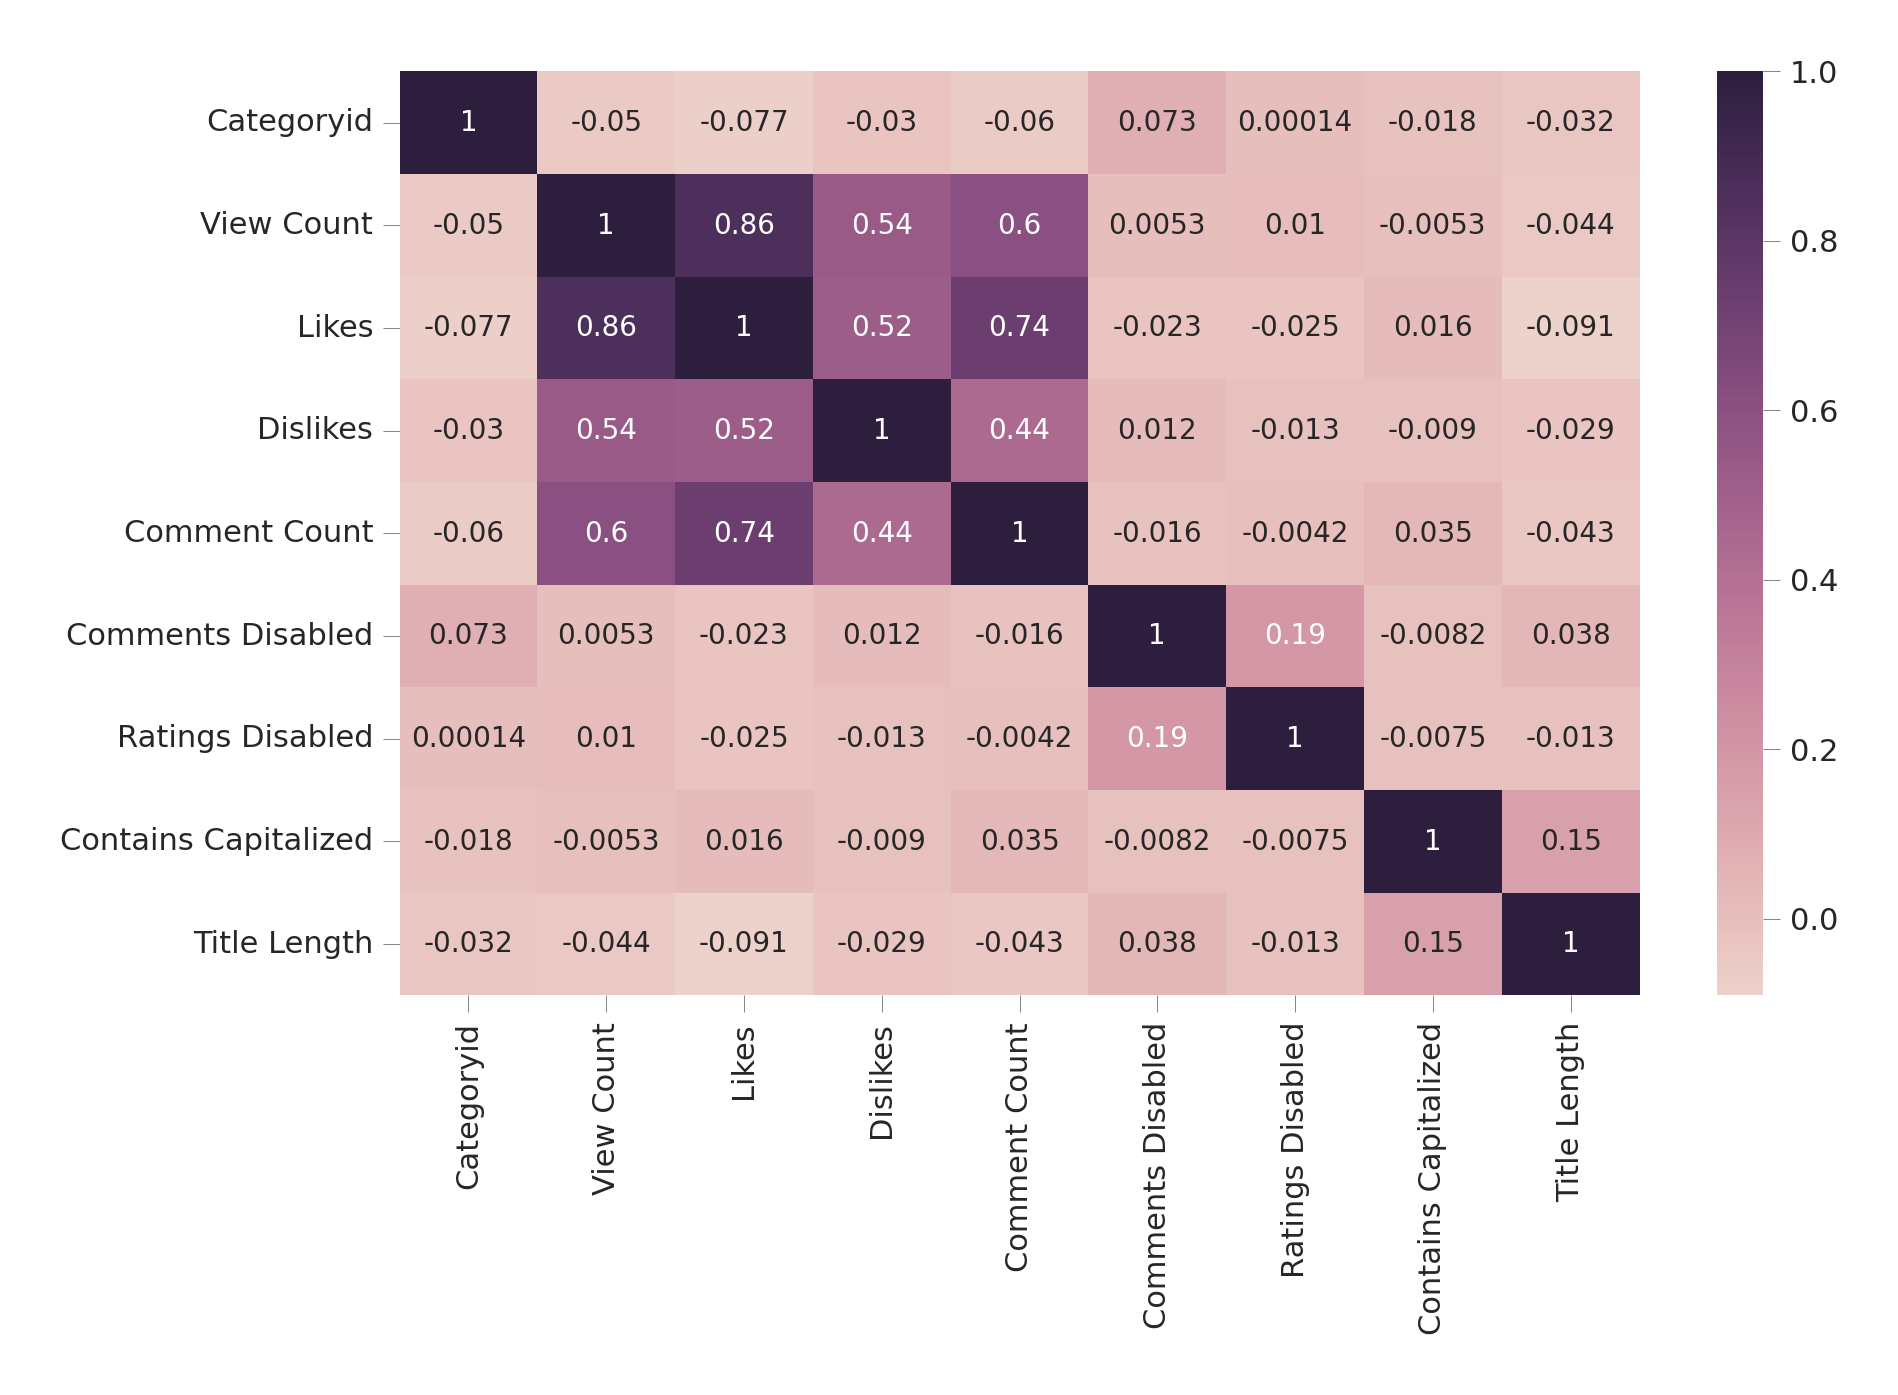

In [ ]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

The correlation map and correlation table above say that views and likes are highly positively correlated. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables

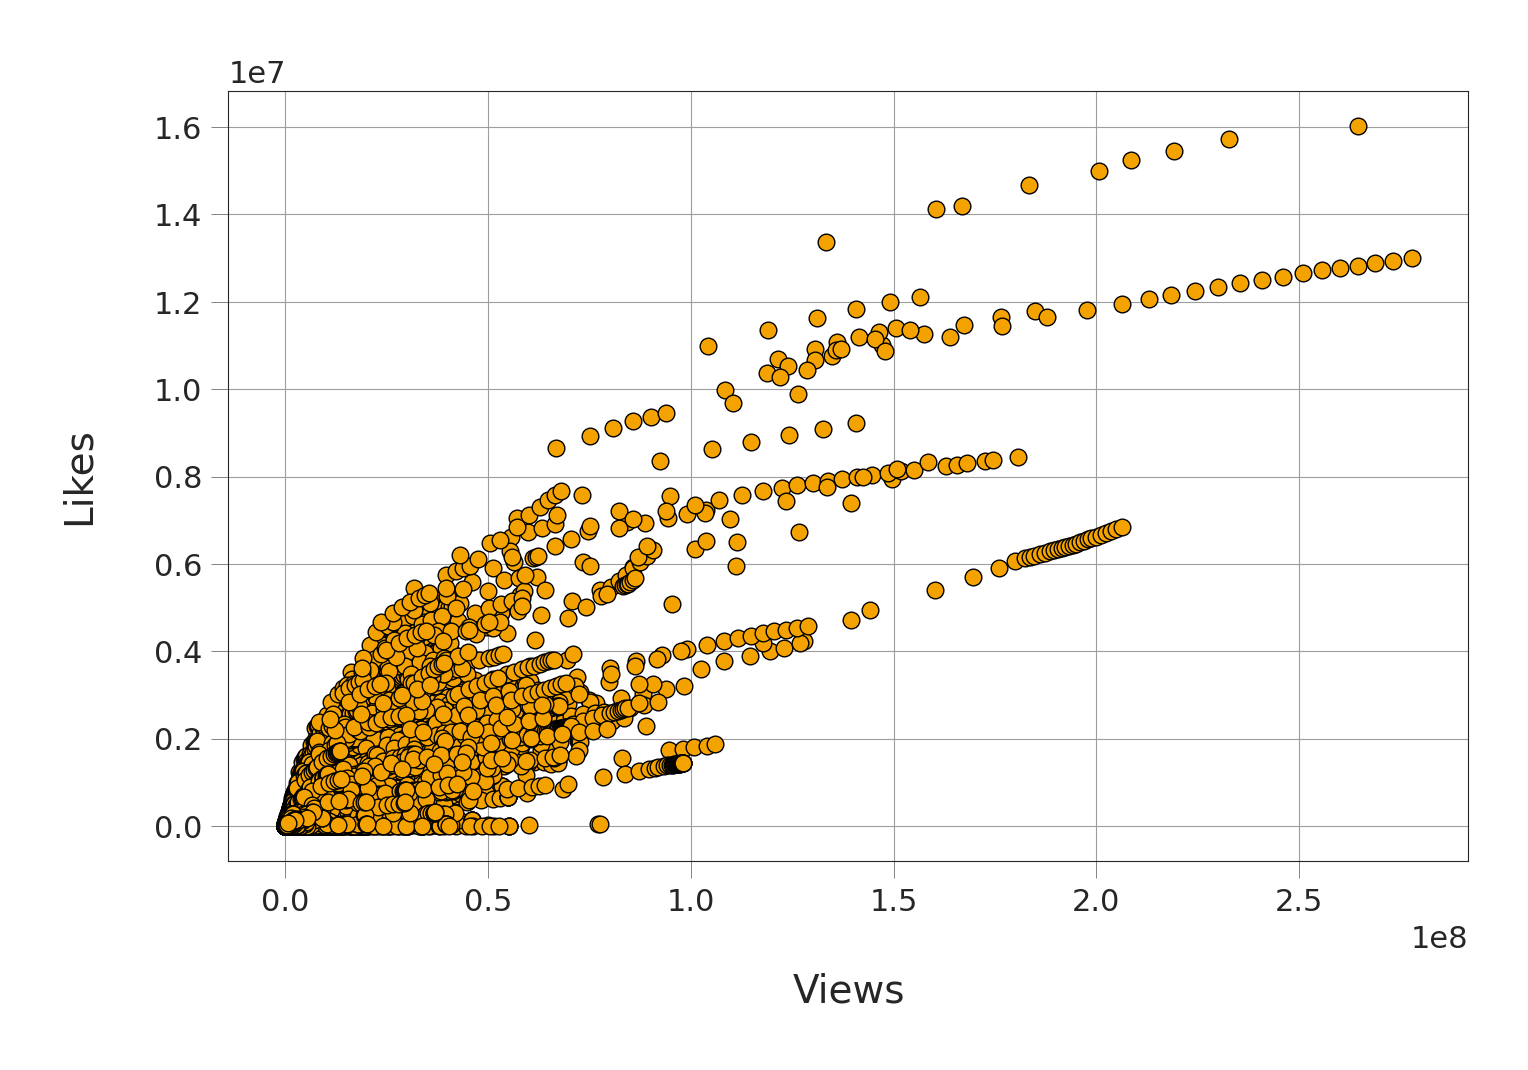

In [ ]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['view_count'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.

Another verification of the correlation matrix and map is the scatter plot we drew above between views and title length as it shows that there is no correlation between them.

## <a name="commti"></a>Most common words in video titles
Let's see if there are some words that are used significantly in trending video titles. We will display the `25` most common words in all trending video titles

In [ ]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 46907),
 ('-', 44451),
 ('The', 22756),
 ('I', 16099),
 ('the', 16053),
 ('in', 13595),
 ('(Official', 12792),
 ('&', 11687),
 ('Video)', 11590),
 ('to', 11273),
 ('of', 10672),
 ('a', 10098),
 ('and', 7446),
 ('A', 7201),
 ('Music', 6843),
 ('Trailer', 6732),
 ('on', 6027),
 ('Minecraft', 5536),
 ('Official', 5275),
 ('My', 5186),
 ('To', 5017),
 ('with', 4570),
 ('Highlights', 4462),
 ('In', 4430),
 ('at', 4304)]

Ignoring words like "the" and "of", we can see that "-" and "|" symbols occured a lot in the `40949` trending video titles: `11452` times and `10663` times respectively. We notice also that words "Video", "Trailer", "How", and "2018" are common in trending video titles; each occured in 1613-1901 video titles.

Let's draw a word cloud for the titles of our trending videos, which is a way to visualize most common words in the titles; the more common the word is, the bigger its font size is

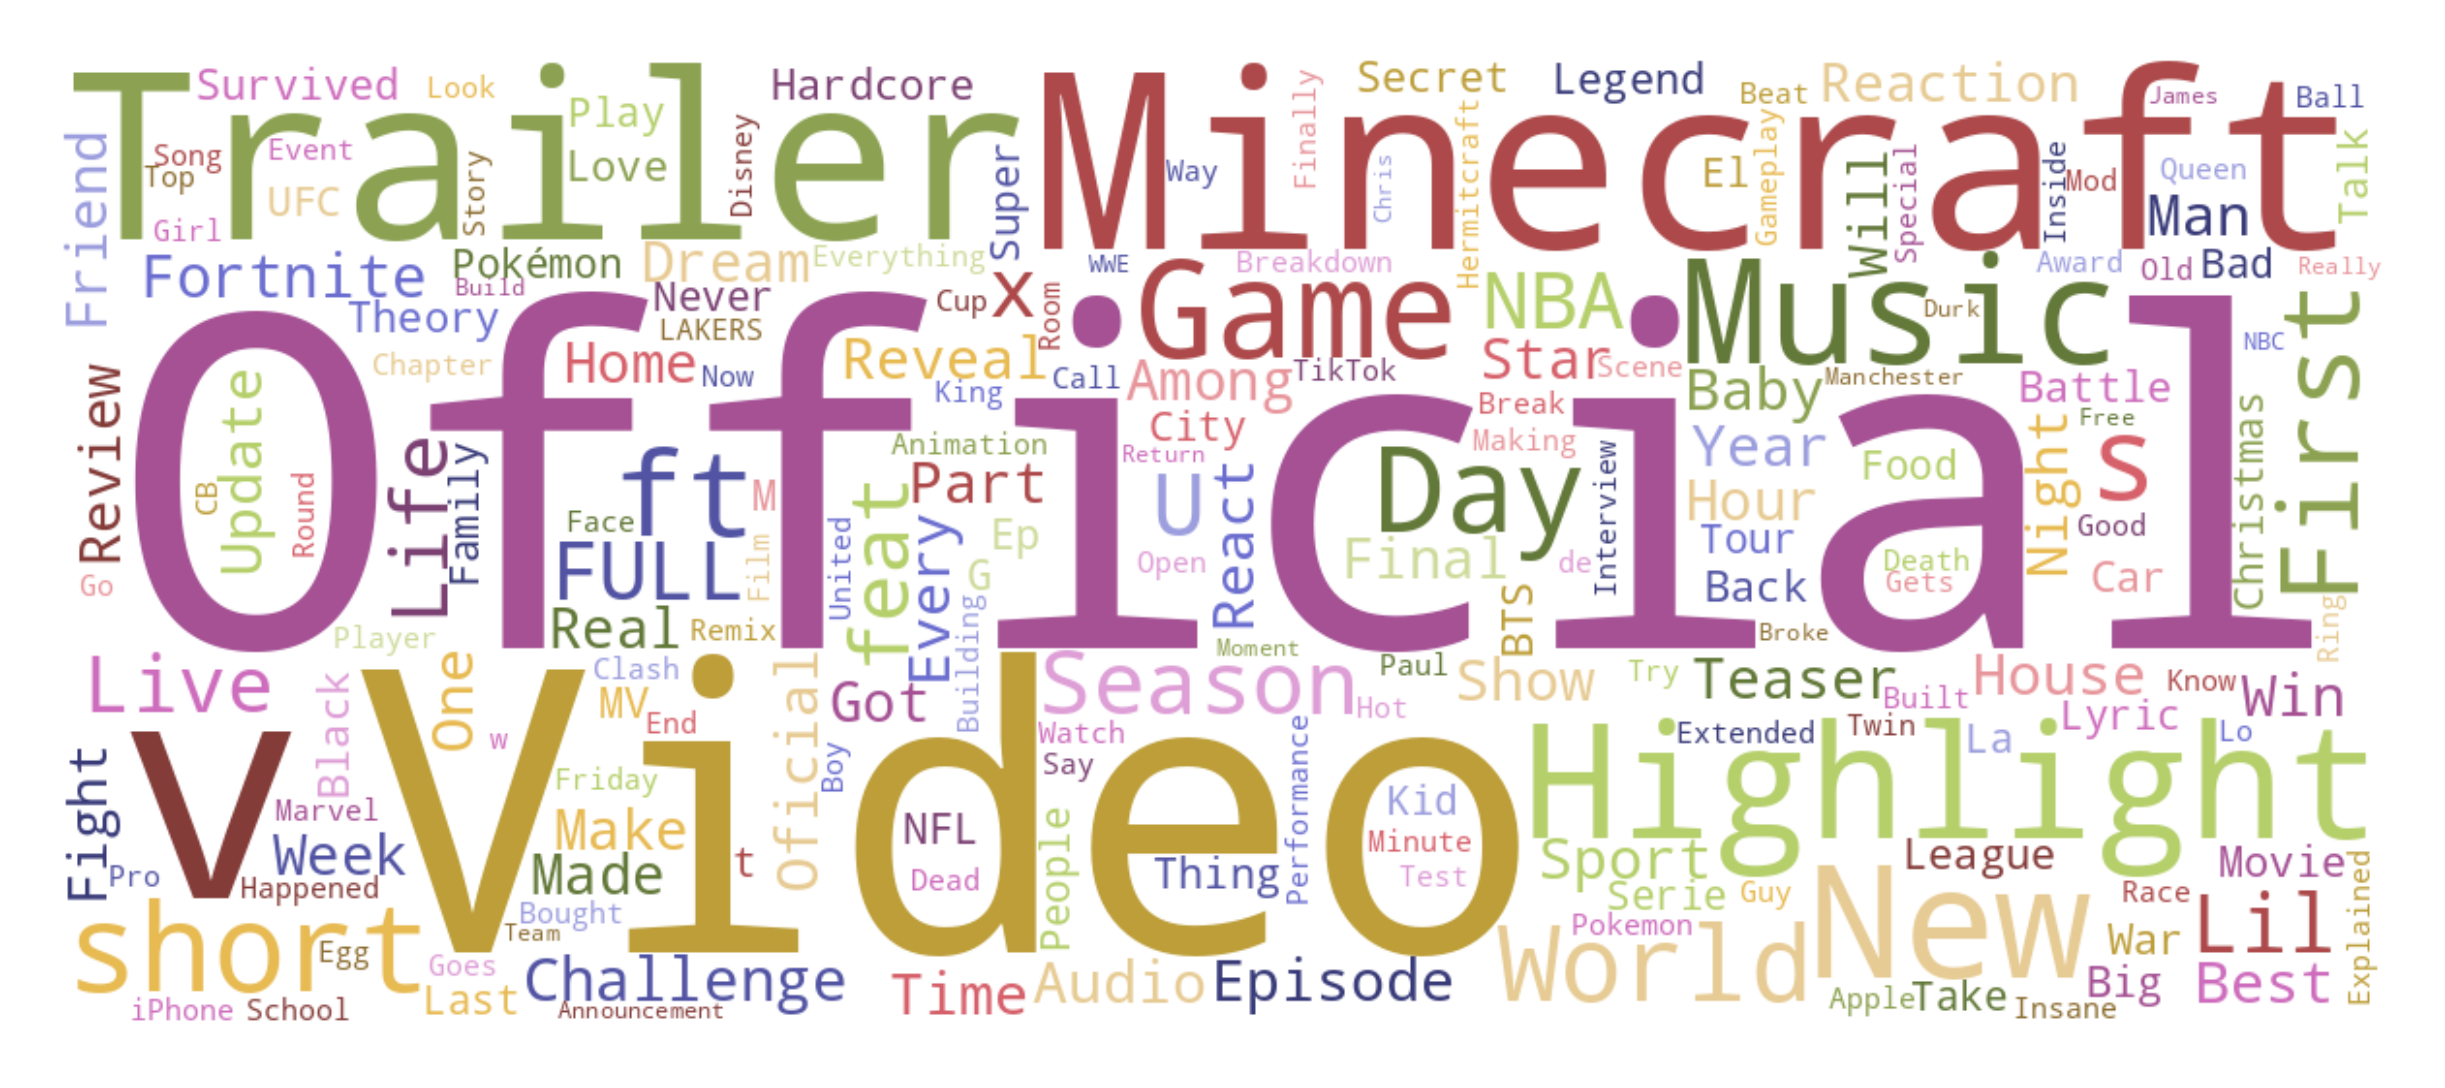

In [ ]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

## <a name="chan"></a>Which channels have the largest number of trending videos?

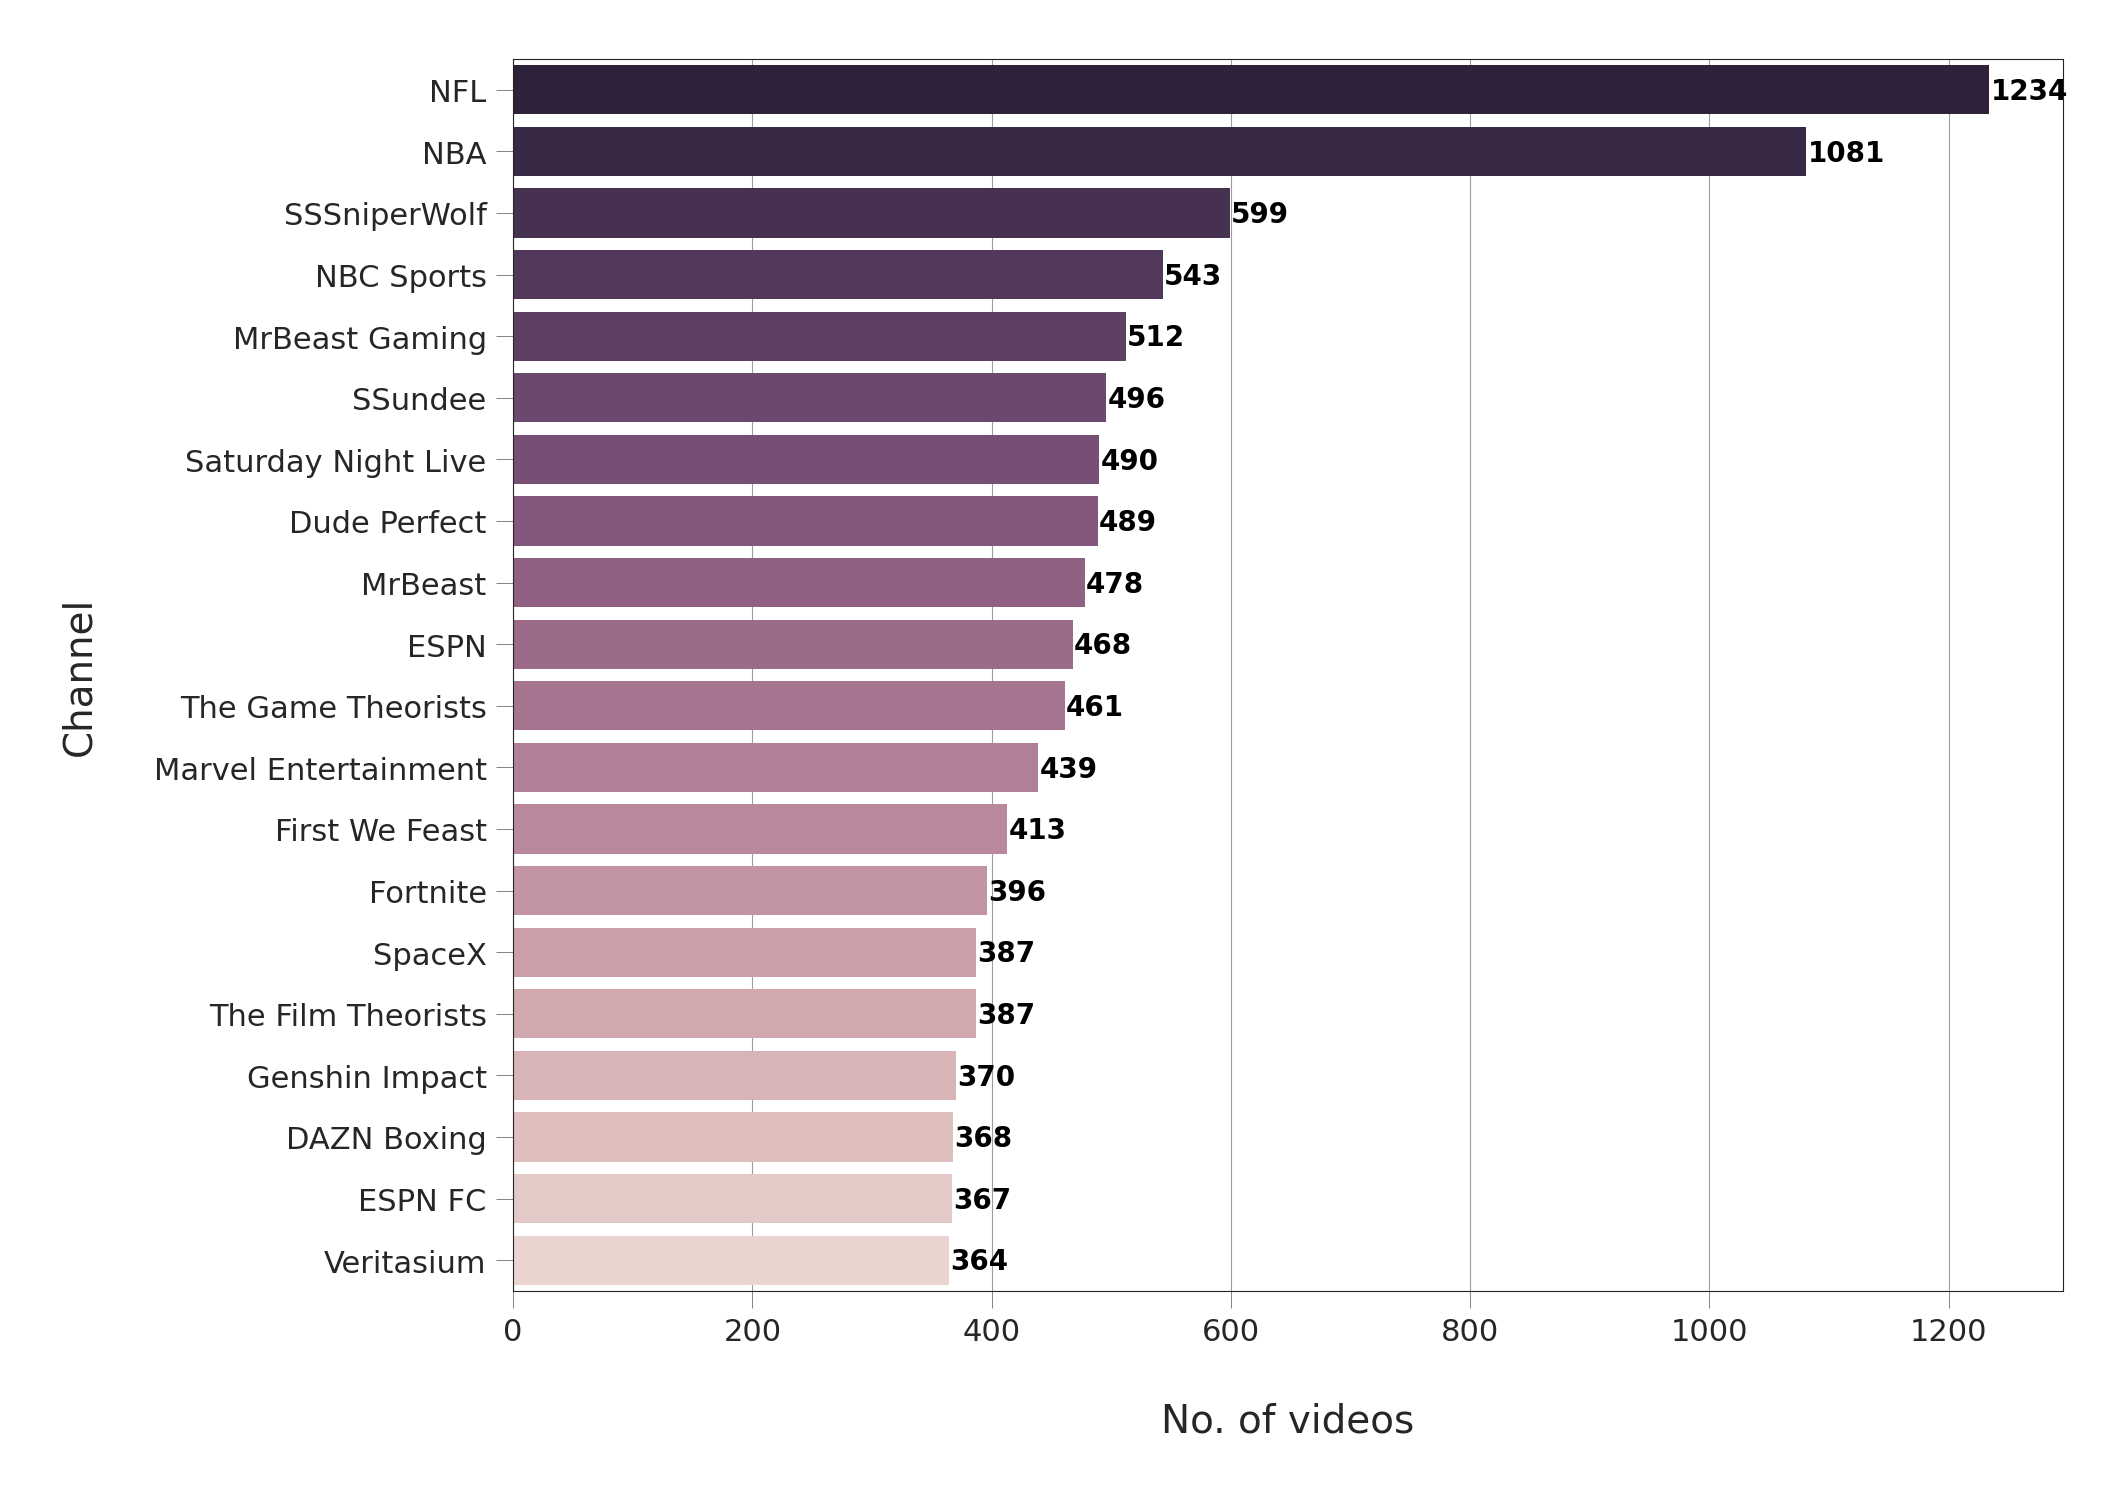

In [ ]:
cdf = df.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10,8))
for i, v in enumerate(cdf['video_count'].head(20)):
    ax.text(v + 1, i + .15, str(v), color='black', fontweight='bold')
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

## <a name="cat"></a>Which video category has the largest number of trending videos?
First, we will add a column that contains category names based on the values in `category_id` column. We will use a category JSON file provided with the dataset which contains information about each category.

In [ ]:
with open("/content/drive/MyDrive/dataset of youtube analysis /archive/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['categoryId'].map(cat_dict)

Now we can see which category had the largest number of trending videos

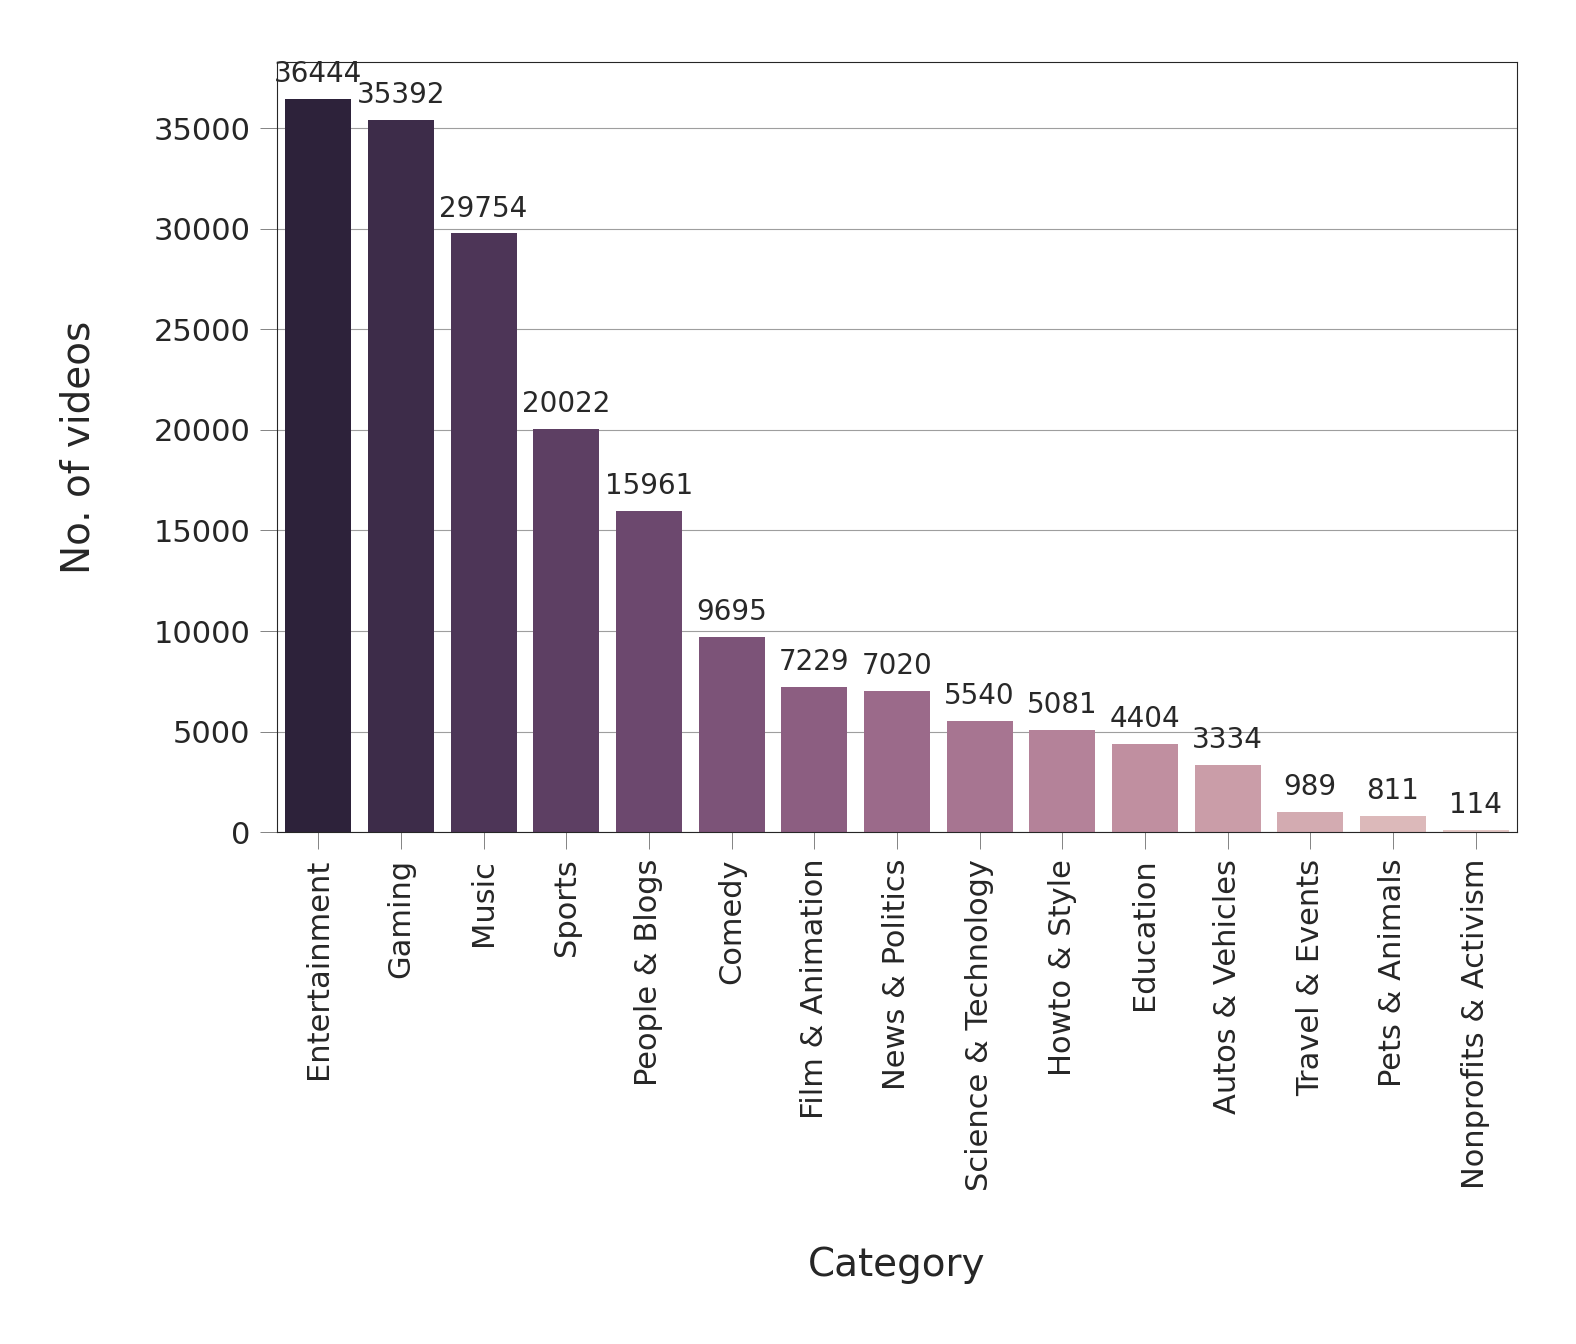

In [ ]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()

_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")
for p in ax.patches:
    _ = ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

We see that the Entertainment category contains the largest number of trending videos among other categories: around `36,444` videos, followed by gaming with around `35,000` videos, followed by music category with around `30,000` videos, and so on.

## <a name="pub"></a>Trending videos and their publishing time
An example value of the `publish_time` column in our dataset is `2017-11-13T17:13:01.000Z`.This means that the date of publishing the video is `2017-11-13` and the time is `17:13:01` in Coordinated Universal Time (UTC) time zone.

Let's add two columns to represent the date and hour of publishing each video, then delete the original `publish_time` column because we will not need it anymore

In [ ]:
df["publishing_day"] = df["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publishedAt"].apply(lambda x: x[11:13])
df.drop(labels='publishedAt', axis=1, inplace=True)

Now we can see which days of the week had the largest numbers of trending videos

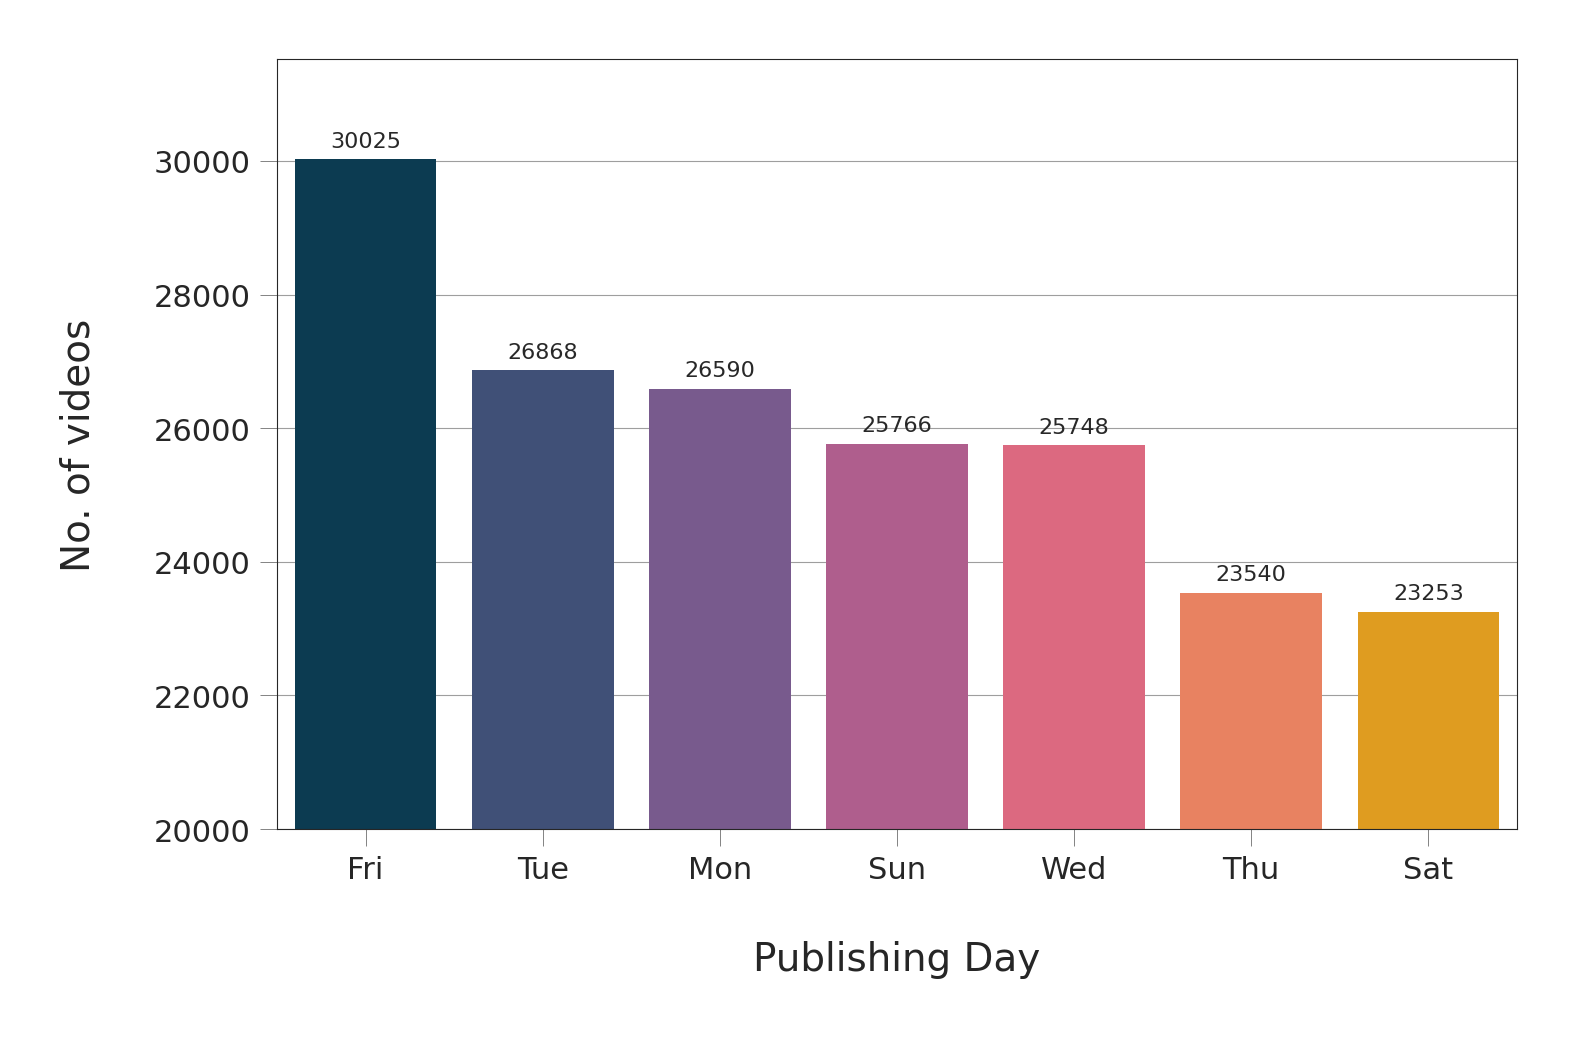

In [ ]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")
_ = ax.set_ylim([20000, ax.get_ylim()[1]]) # set y-axis limits
for p in ax.containers:
    # Iterate through each rectangle patch in each bar
    for r in p:
        # Get the height of the rectangle patch
        height = r.get_height()
        # Add an annotation above the rectangle patch
        ax.annotate(f"{int(height)}", xy=(r.get_x() + r.get_width() / 2, height), 
                    xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom', fontsize=8)


We can see that the number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.

Now let's use `publishing_hour` column to see which publishing hours had the largest number of trending videos

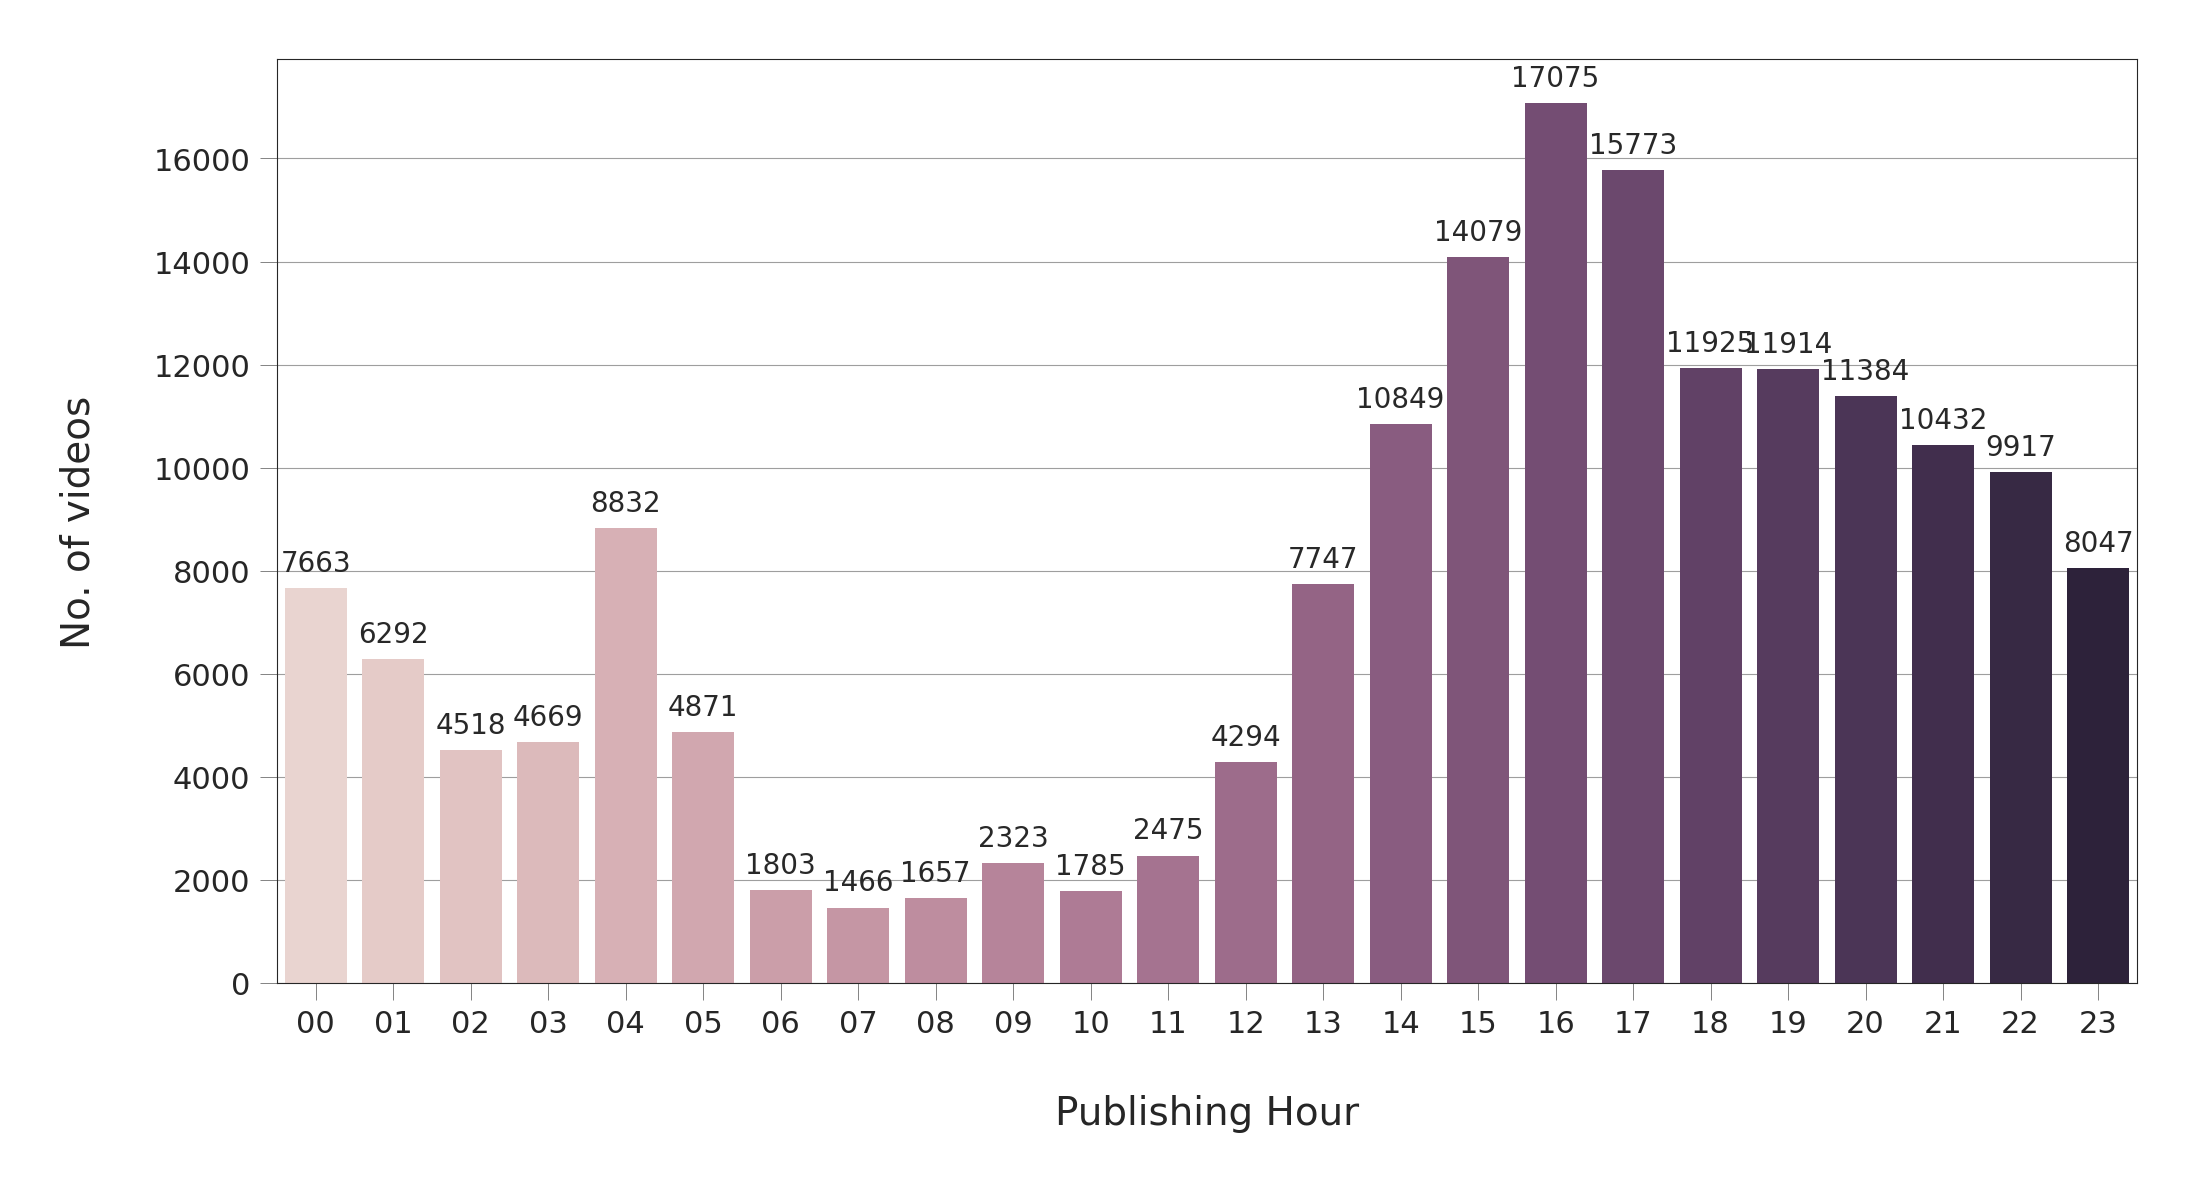

In [ ]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
cdf = cdf.sort_values(by="publishing_hour") # sorting by publishing_hour in ascending order
fig, ax = plt.subplots(figsize=(12, 6))
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")
for p in ax.patches:
    _ = ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')


We can see that the period between 2PM and 7PM, peaking between 4PM and 5PM, had the largest number of trending videos. We notice also that the period between 6AM and 11AM has the smallest number of trending videos. But why is that? Is it because people publish a lot more videos between 2PM and 7PM? Is it because how YouTube algorithm chooses trending videos?

## <a name="commdis"></a>How many trending videos have their commets disabled?
To know that, we use `comments_disabled` column

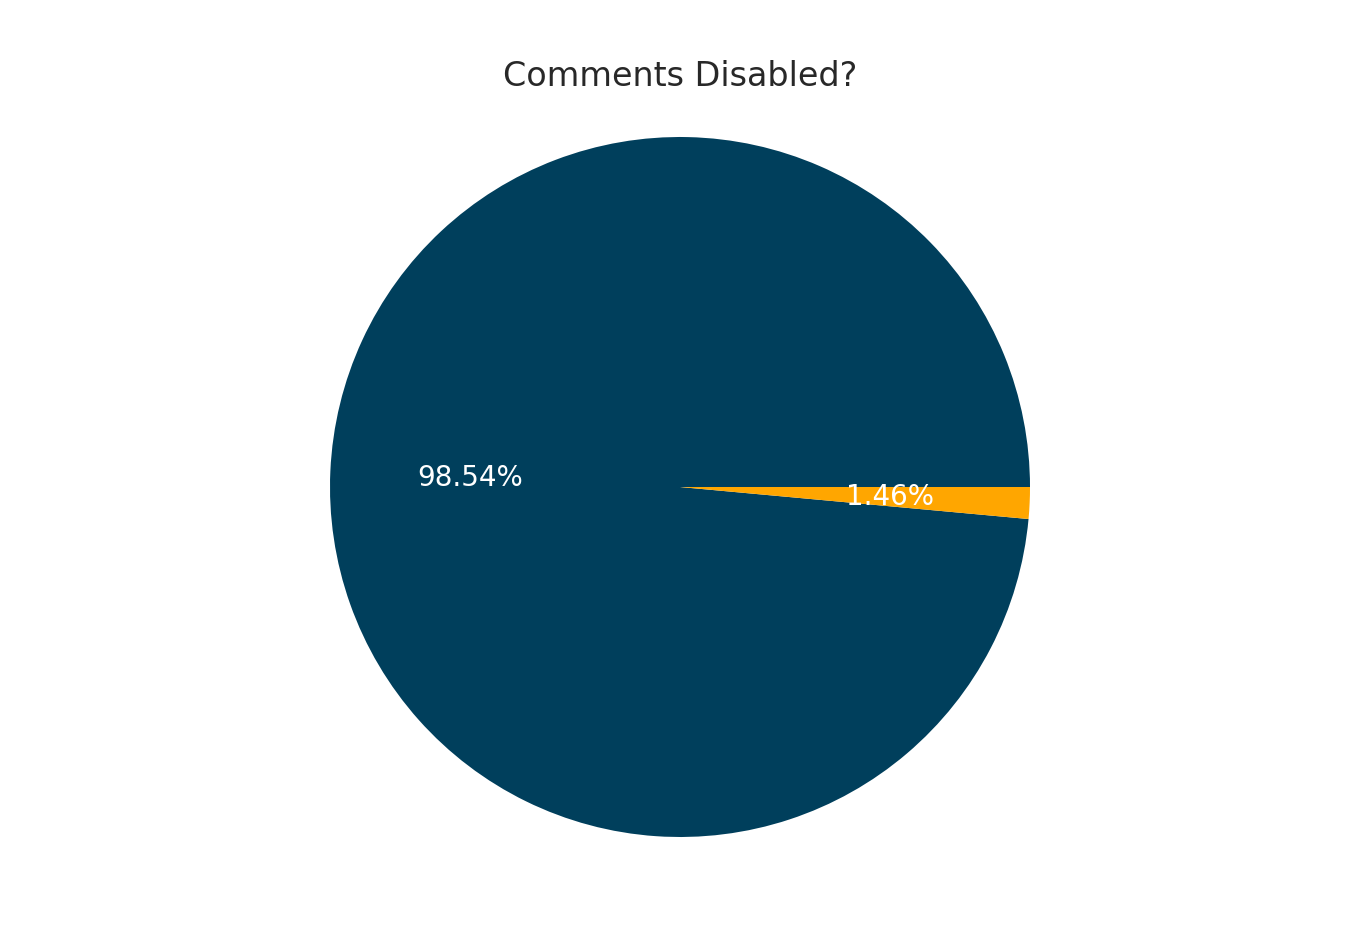

In [ ]:
value_counts = df["comments_disabled"].value_counts()
fig, ax = plt.subplots()
_ = ax.pie(x=value_counts, labels=value_counts.index.map({False: 'No', True: 'Yes'}), 
           colors=['#003f5c', '#ffa600'], textprops={'color': 'white'},
           autopct=lambda p:f'{p:.2f}%')
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [ ]:
df["comments_disabled"].value_counts(normalize=True)

False   0.99
True    0.01
Name: comments_disabled, dtype: float64

We see that only `1.46%` of trending videos prevented users from commenting.

## <a name="ratdis"></a>How many trending videos have their ratings disabled?
To know that, we use `ratings_disabled` column

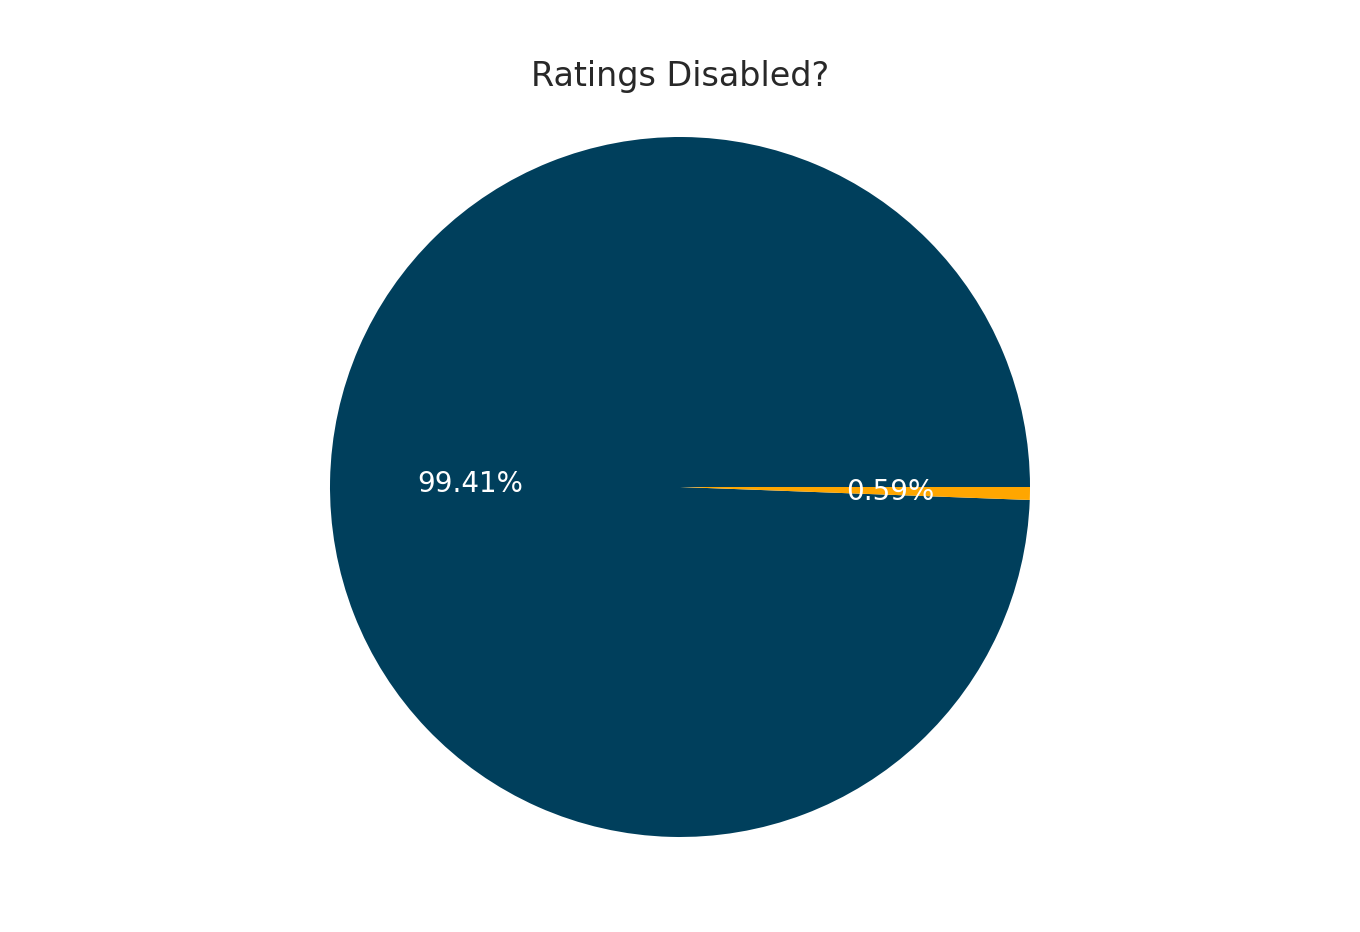

In [ ]:
value_counts = df["ratings_disabled"].value_counts()
fig, ax = plt.subplots()
_ = ax.pie(x=value_counts, labels=value_counts.index.map({False: 'No', True: 'Yes'}), 
           colors=['#003f5c', '#ffa600'], textprops={'color': 'white'},
           autopct=lambda p:f'{p:.2f}%')
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [ ]:
df["ratings_disabled"].value_counts()

False    180716
True       1074
Name: ratings_disabled, dtype: int64

We see that only `1074` trending videos out of `180716` prevented users from commenting.

## <a name="commratdis"></a>How many videos have both comments and ratings disabled?

In [ ]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

330

So there are just `330` trending videos that have both comments and ratings disabled

## <a name="conc"></a>Conclusions
Here are some of the results we extracted from the analysis:

* The dataset contains `181,790` entries collected between `2020` and `2023`.
* Most videos have less than `5 million` views and between `0-100,000` likes.
* There is a high positive correlation between `views and likes`, `likes and comment` count, and `dislikes and comment` count.
* Entertainment is the most popular category among trending videos.
* Most videos have titles between `30-60` characters.
* The majority of videos allow `comments` and `ratings`.
* Videos published on weekends are less likely to trend than videos published on weekdays.
* Common words in titles include `"#shorts"`, `"song"`, `"Episode"`, and `"2021"`.
* There is no clear relationship between `title length` and `number of views`.
* Channels with the most trending videos are `"The Tonight Show Starring Jimmy Fallon"`, `"The Late Show with Stephen Colbert"`, and `"TheEllenShow"`.
